In [3]:
TYPE_OF_SKEW = ["feature", "label", "qty"]
DATASETS = ["EMNIST", "MNIST", "SVHN_CROPPED", "CIFAR10"]
FEATURE_SKEWS = ["0.02", "0.1"]
LABEL_SKEWS = ["0.1", "1.0", "5.0"]
QTY_SKEWS = ["0.1", "0.4", "1.0", "2.0"]
NR_PARTIES = [10, 20]

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import numpy as np
from pprint import pprint
import seaborn as sns

from read_data import get_client_res, get_fedavg_res
from utils import baseline_results, sum_dicts
from heuristic_funcs import aggregate_results
from plot import plot_results

sns.set_theme()

In [6]:
## Test

hps_test, accs_test, best_acc_test, ratios_test = get_client_res(DATASETS[0], FEATURE_SKEWS[0],
                                                                 NR_PARTIES[0], TYPE_OF_SKEW[0])
agg_params = aggregate_results(hps_test, accs_test, best_acc_test, ratios_test,
                               type_of_skew=TYPE_OF_SKEW[0])
mean_params = baseline_results(hps_test, np.mean)
median_params = baseline_results(hps_test, np.median)
fedavg_params = get_fedavg_res(DATASETS[0], FEATURE_SKEWS[0], NR_PARTIES[0], TYPE_OF_SKEW[0])

print("Aggregated parameters")
pprint(agg_params)
print("Mean parameters")
pprint(mean_params)
print("Median parameters")
pprint(median_params)
print("FEDAVG parameters")
pprint(fedavg_params)

Aggregated parameters
{'batch_size': 16,
 'server_lr': 0.02128237818479538,
 'server_momentum': 0.5996034584939482}
Mean parameters
{'batch_size': 16, 'server_lr': 0.36, 'server_momentum': 0.9349999999999999}
Median parameters
{'batch_size': 16, 'server_lr': 0.3, 'server_momentum': 0.95}
FEDAVG parameters
{'batch_size': 32,
 'client_lr': 0.3,
 'client_momentum': 0.0,
 'epochs_per_round': 2,
 'rounds': 30,
 'server_lr': 0.03162277660168379,
 'server_momentum': 0.9,
 'skew': 0.02}


# Results + Evaluation

## Feature skew

### Feature skew - Learning Rate

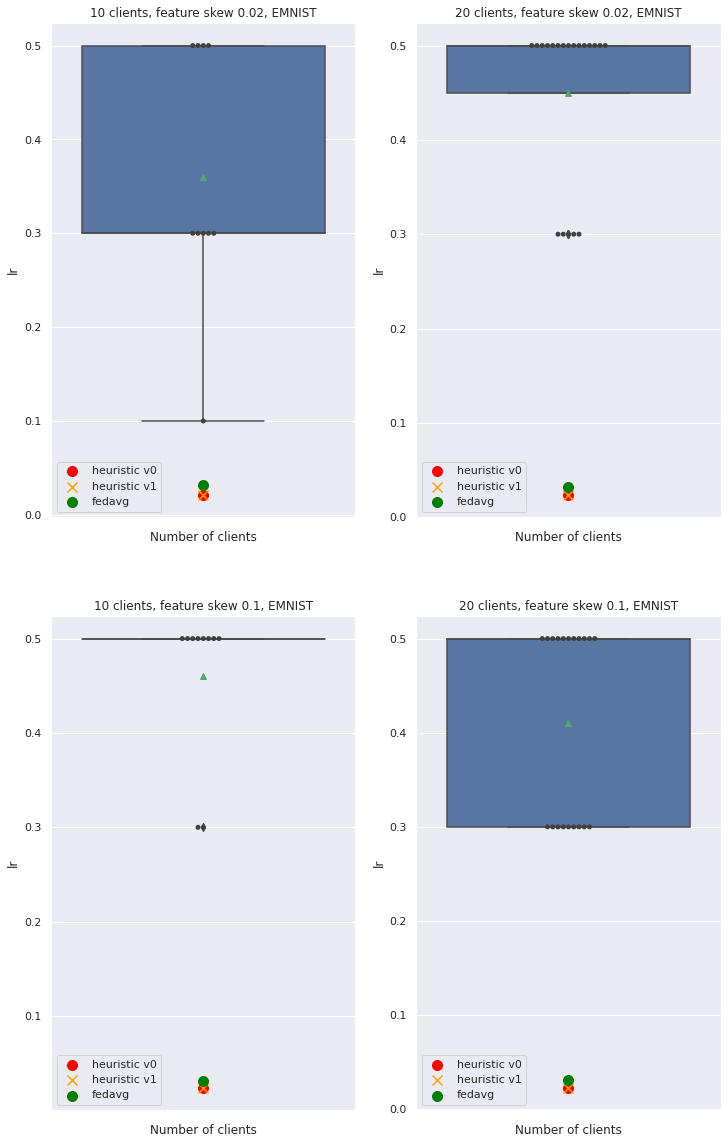

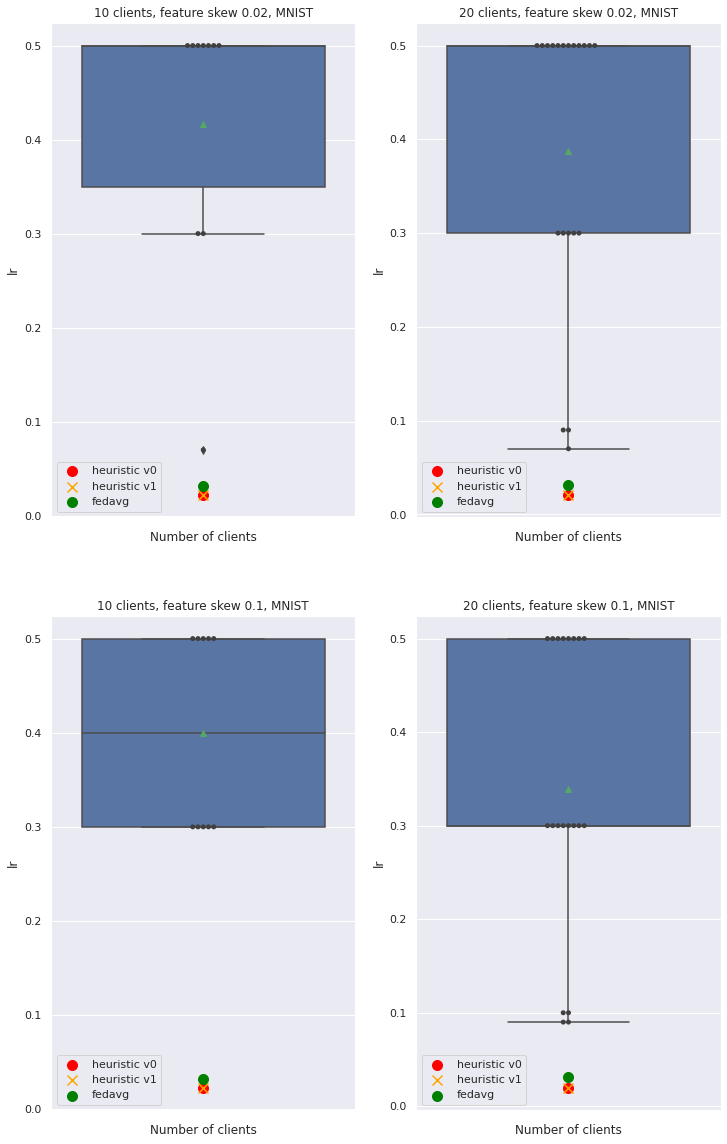

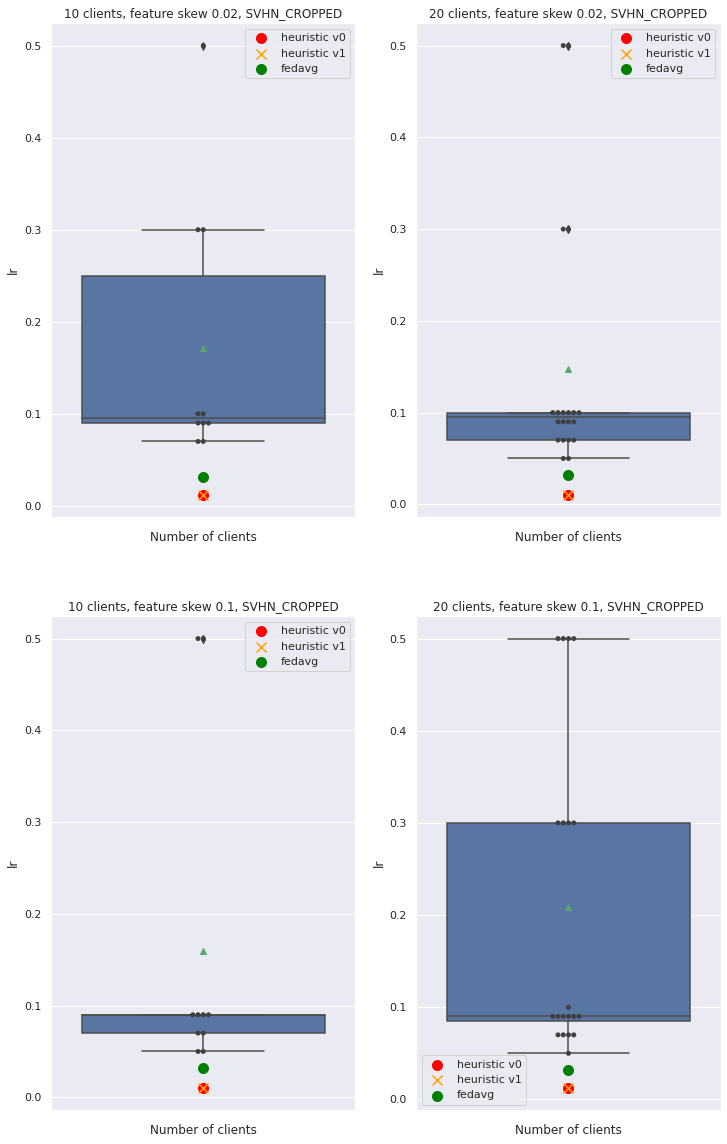

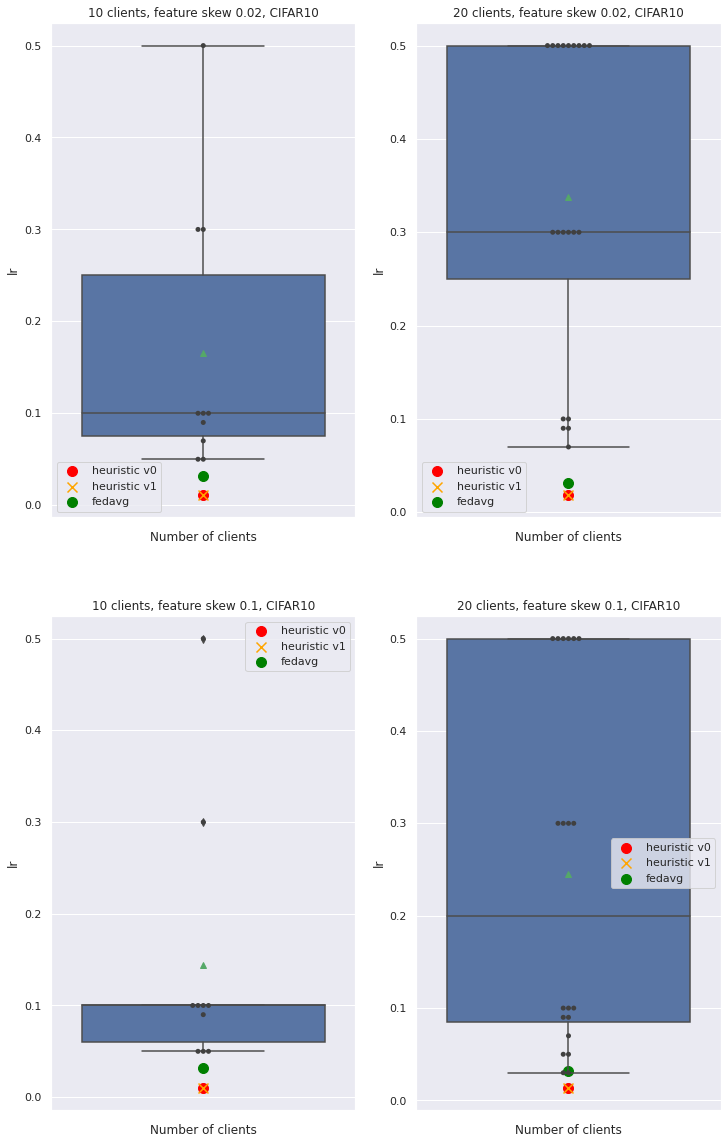

In [7]:
lr_feature_heuristic_aes = {}
lr_feature_baseline_aes = {}

for d in DATASETS:
    heuristic_aes, baseline_aes = plot_results(d, FEATURE_SKEWS, NR_PARTIES, "lr", "feature")
    lr_feature_heuristic_aes = sum_dicts(lr_feature_heuristic_aes, heuristic_aes)
    lr_feature_baseline_aes = sum_dicts(lr_feature_baseline_aes, baseline_aes)

In [8]:
for v in ['v0', 'v1']:
    print(f"Heuristic {v} MAE: {np.mean(lr_feature_heuristic_aes[v]):.3f} ± {np.std(lr_feature_heuristic_aes[v]):.3f}")
print(f"Mean MAE: {np.mean(lr_feature_baseline_aes['mean']):.3f} ± {np.std(lr_feature_baseline_aes['mean']):.3f}")
print(f"Median MAE: {np.mean(lr_feature_baseline_aes['median']):.3f} ± {np.std(lr_feature_baseline_aes['median']):.3f}")

Heuristic v0 MAE: 0.014 ± 0.005
Heuristic v1 MAE: 0.014 ± 0.005
Mean MAE: 0.269 ± 0.115
Median MAE: 0.254 ± 0.171


Comments:
- Heuristic performs well, considerably better than baselines.
- Global learning rate consistently smaller than local learning rates found by clients.

### Feature skew - Batch Size Results

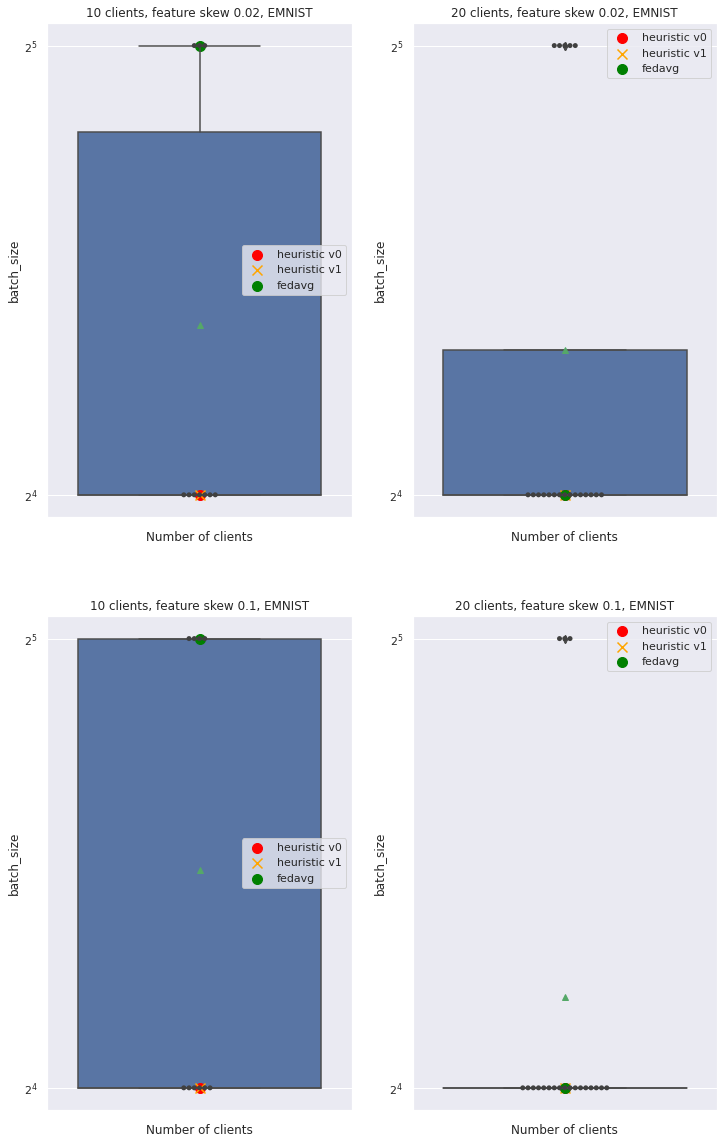

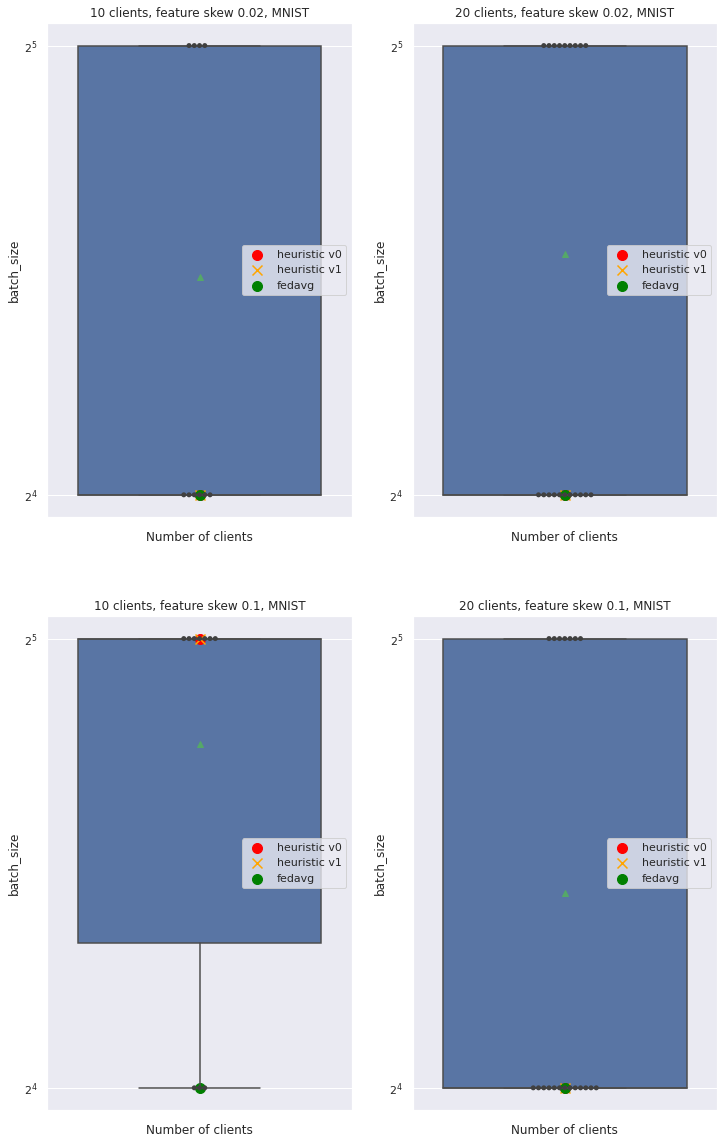

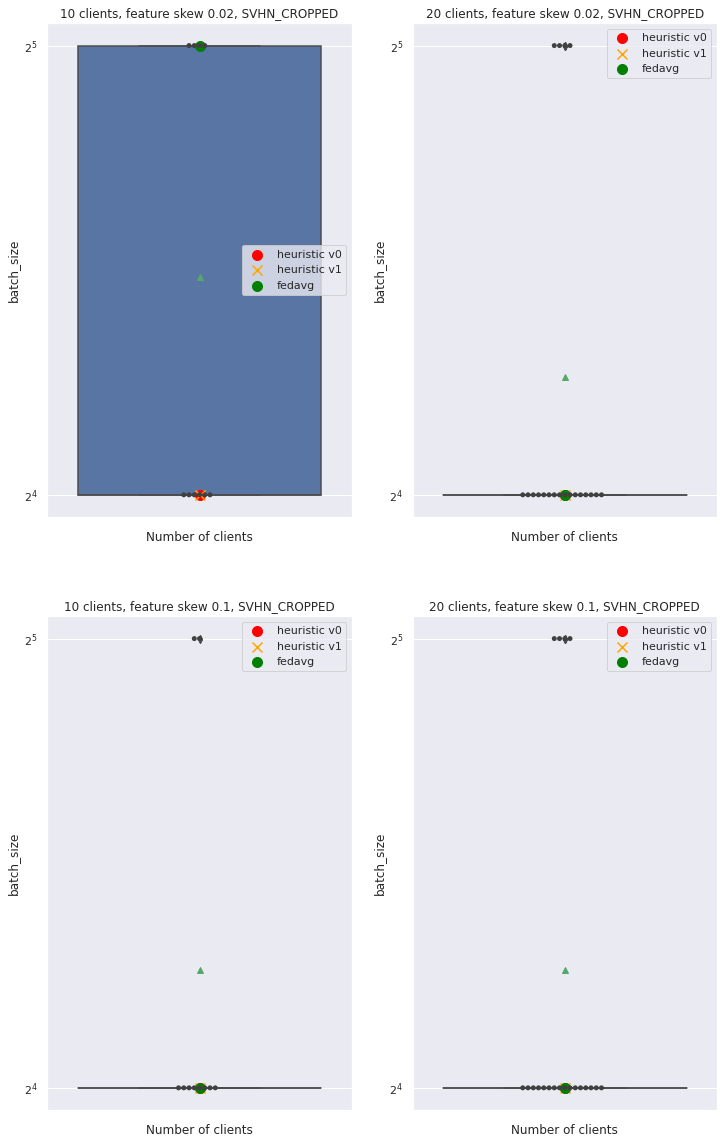

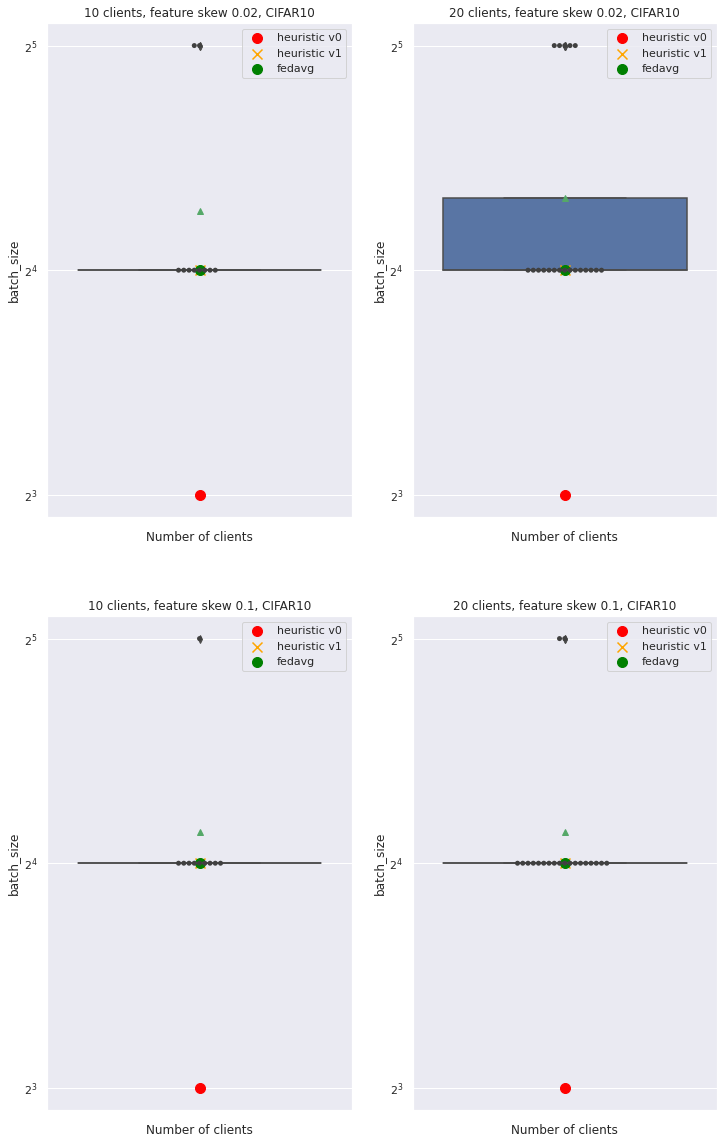

In [9]:
bs_feature_heuristic_aes = {}
bs_feature_baseline_aes = {}

for d in DATASETS:
    heuristic_aes, baseline_aes = plot_results(d, FEATURE_SKEWS, NR_PARTIES, "batch_size", "feature")
    bs_feature_heuristic_aes = sum_dicts(bs_feature_heuristic_aes, heuristic_aes)
    bs_feature_baseline_aes = sum_dicts(bs_feature_baseline_aes, baseline_aes)

In [10]:
for v in ['v0', 'v1']:
    print(f"Heuristic {v} MAE: {np.mean(bs_feature_heuristic_aes[v]):.3f} ± {np.std(bs_feature_heuristic_aes[v]):.3f}")
print(f"Mean MAE: {np.mean(bs_feature_baseline_aes['mean']):.3f} ± {np.std(bs_feature_baseline_aes['mean']):.3f}")
print(f"Median MAE: {np.mean(bs_feature_baseline_aes['median']):.3f} ± {np.std(bs_feature_baseline_aes['median']):.3f}")
print(f"Mode MAE: {np.mean(bs_feature_baseline_aes['mode']):.3f} ± {np.std(bs_feature_baseline_aes['mode']):.3f}")

Heuristic v0 MAE: 6.000 ± 6.633
Heuristic v1 MAE: 4.000 ± 6.928
Mean MAE: 4.000 ± 6.928
Median MAE: 4.000 ± 6.928
Mode MAE: 4.000 ± 6.928


Comments:
- Mean between two batch sizes does not make sense, since the fedavg batch size is discrete
    - solution: project aggregation result to the closest power of two
- Batch size heuristic slightly worse performance than baseline.
- In general, heuristic tends to underestimate best batch size.
- Accuracy might be more suitable metric.

### Feature skew - Momentum Results

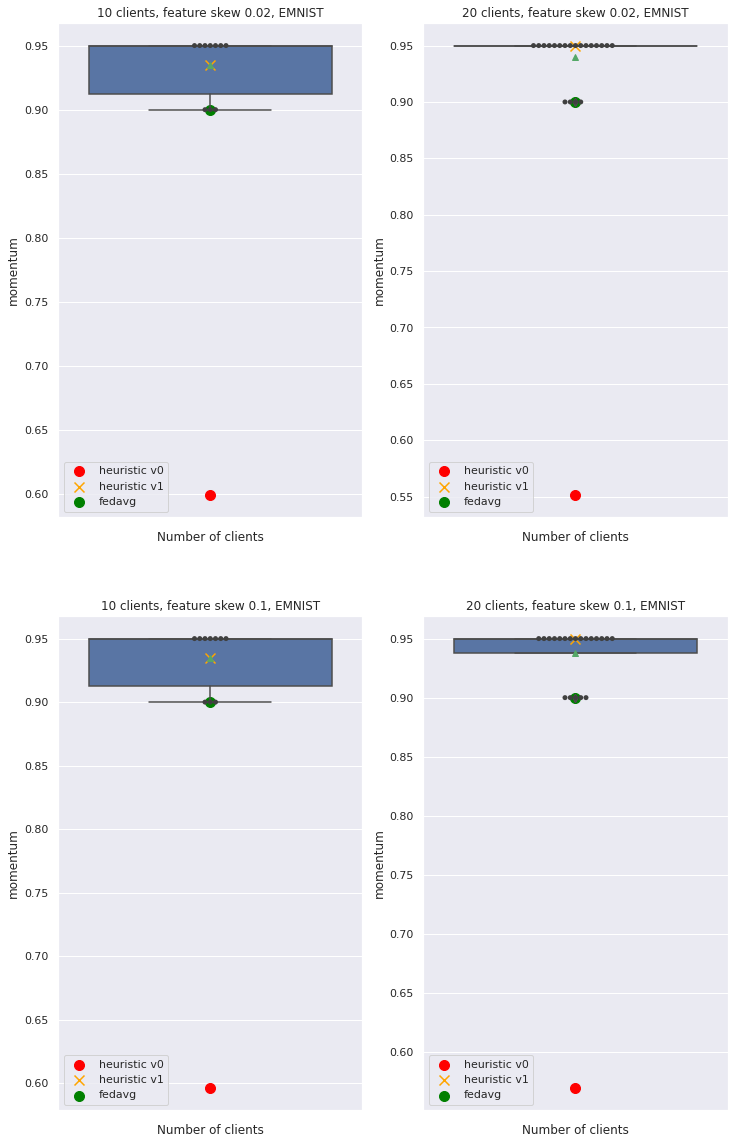

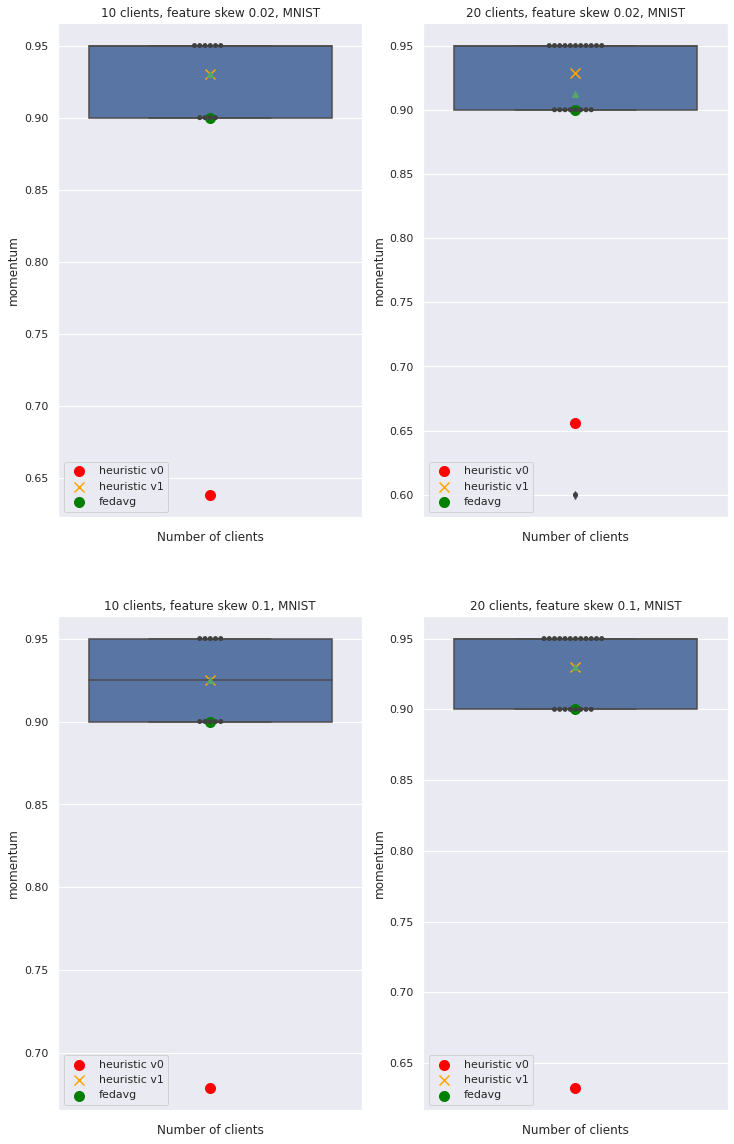

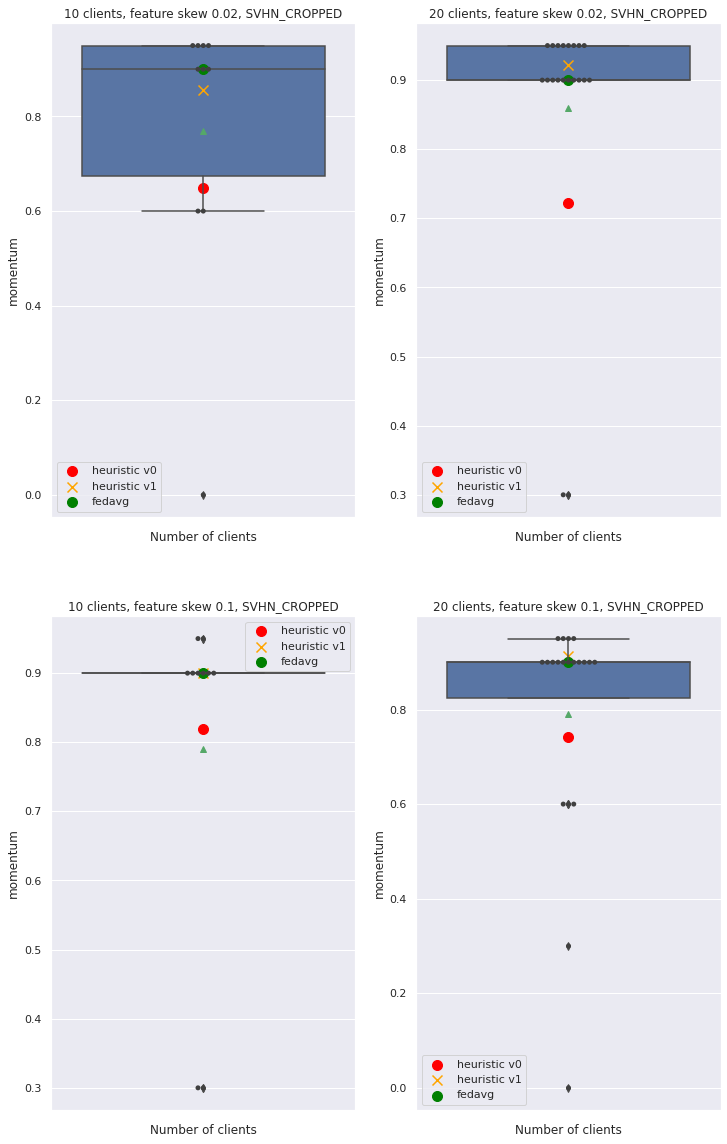

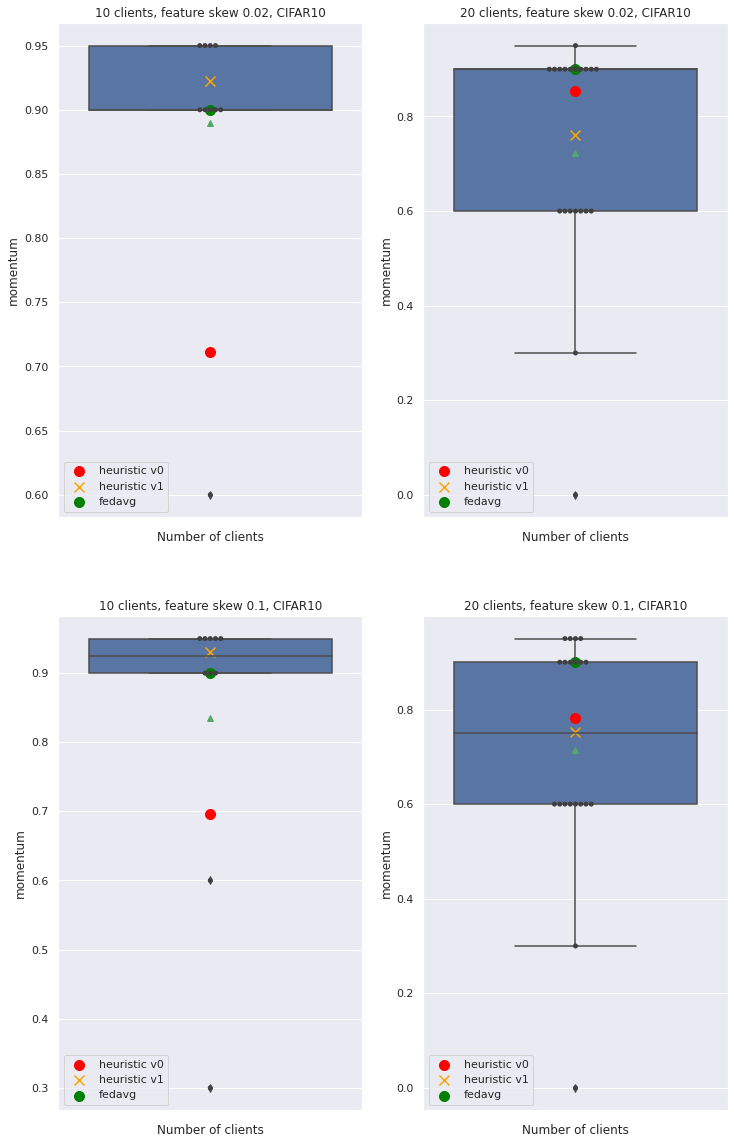

In [11]:
mom_feature_heuristic_aes = {}
mom_feature_baseline_aes = {}

for d in DATASETS:
    heuristic_aes, baseline_aes = plot_results(d, FEATURE_SKEWS, NR_PARTIES, "momentum", "feature")
    mom_feature_heuristic_aes = sum_dicts(mom_feature_heuristic_aes, heuristic_aes)
    mom_feature_baseline_aes = sum_dicts(mom_feature_baseline_aes, baseline_aes)

In [12]:
for v in ['v0', 'v1']:
    print(
        f"Heuristic {v} MAE: {np.mean(mom_feature_heuristic_aes[v]):.3f} ± {np.std(mom_feature_heuristic_aes[v]):.3f}")
print(f"Mean MAE: {np.mean(mom_feature_baseline_aes['mean']):.3f} ± {np.std(mom_feature_baseline_aes['mean']):.3f}")
print(
    f"Median MAE: {np.mean(mom_feature_baseline_aes['median']):.3f} ± {np.std(mom_feature_baseline_aes['median']):.3f}")

Heuristic v0 MAE: 0.219 ± 0.085
Heuristic v1 MAE: 0.044 ± 0.040
Mean MAE: 0.067 ± 0.055
Median MAE: 0.034 ± 0.037


Comments:
- Heuristic performs very badly, tends to underestimate global momentum.
- Median gives best performance, mean is also good.
- Best fedavg momentum tends to be in the 75% percentile of clients' momentums.


## Label skew

## Label skew - Learning Rate Results

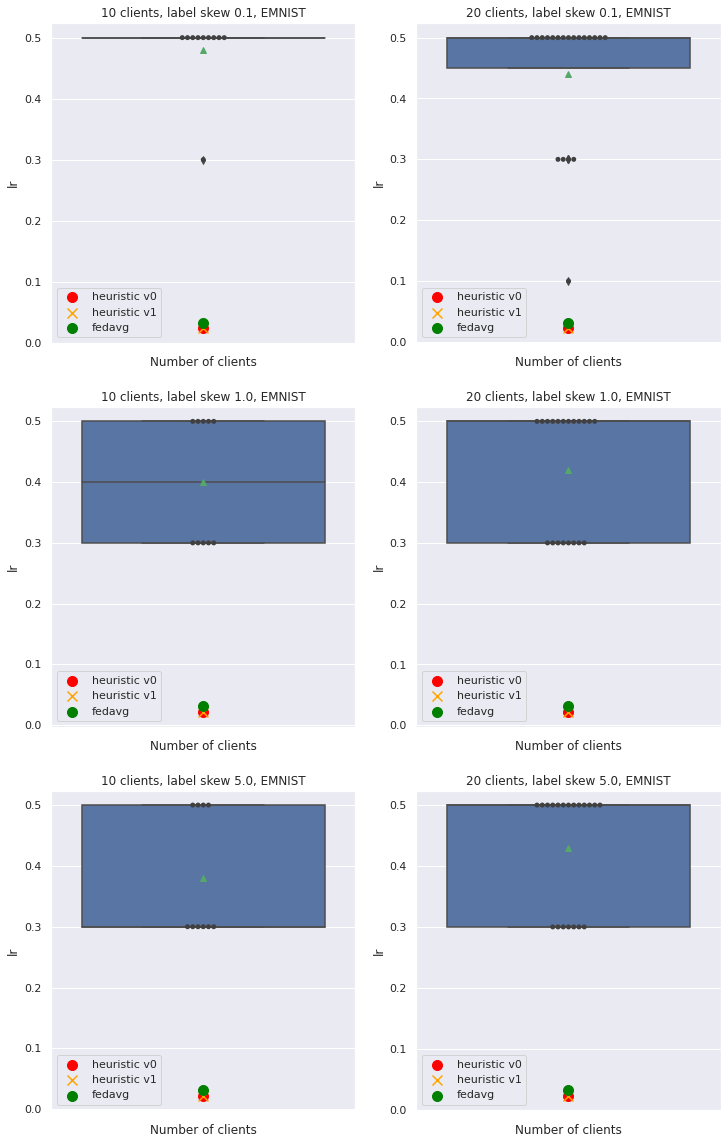

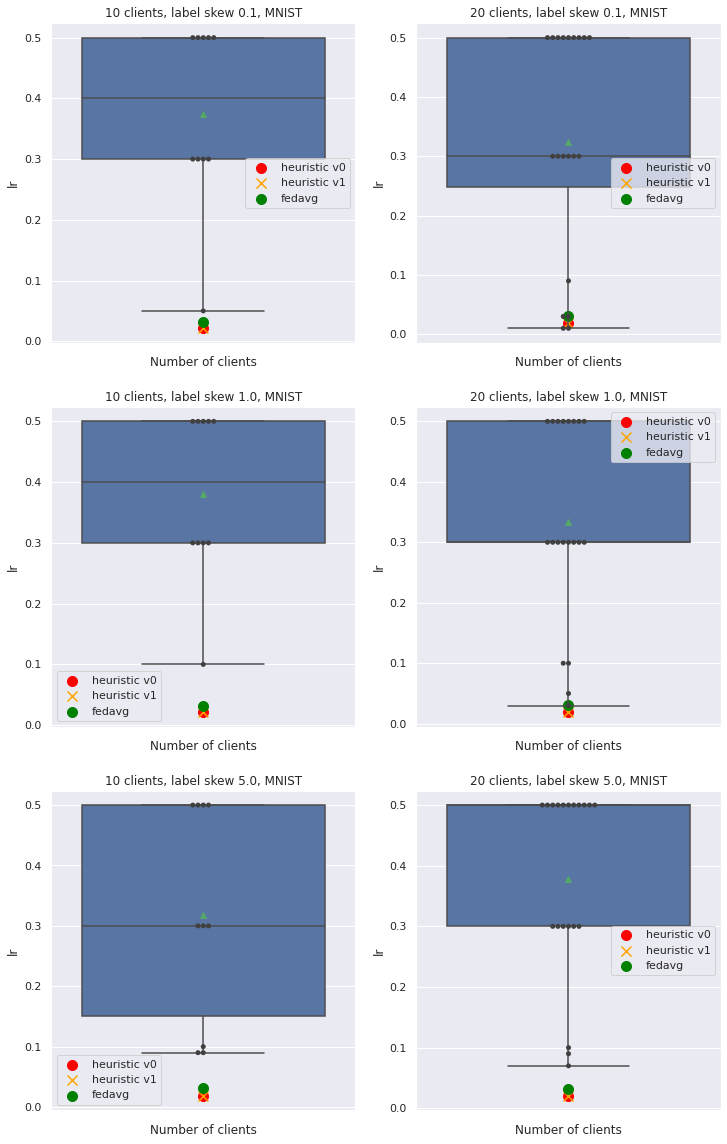

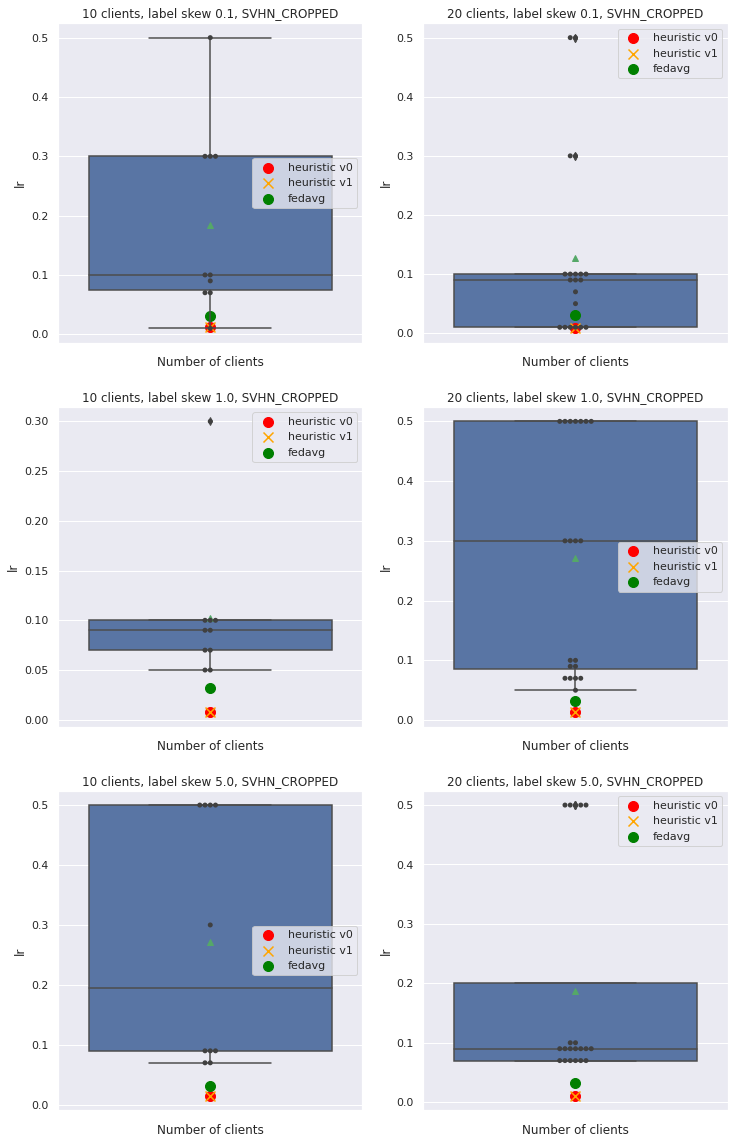

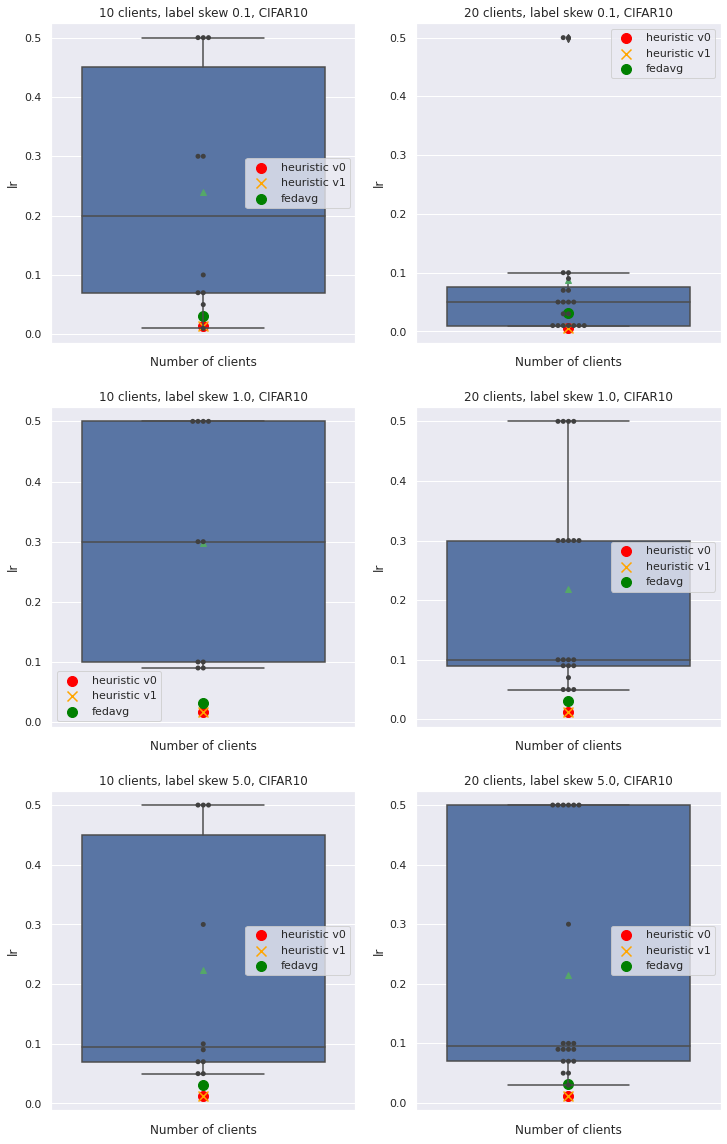

In [13]:
lr_label_heuristic_aes = {}
lr_label_baseline_aes = {}

for d in DATASETS:
    heuristic_aes, baseline_aes = plot_results(d, LABEL_SKEWS, NR_PARTIES, "lr", "label")
    lr_label_heuristic_aes = sum_dicts(lr_label_heuristic_aes, heuristic_aes)
    lr_label_baseline_aes = sum_dicts(lr_label_baseline_aes, baseline_aes)

In [14]:
for v in ['v0']:
    print(f"Heuristic {v} MAE: {np.mean(lr_label_heuristic_aes[v]):.3f} ± {np.std(lr_label_heuristic_aes[v]):.3f}")
print(f"Mean MAE: {np.mean(lr_label_baseline_aes['mean']):.3f} ± {np.std(lr_label_baseline_aes['mean']):.3f}")
print(f"Median MAE: {np.mean(lr_label_baseline_aes['median']):.3f} ± {np.std(lr_label_baseline_aes['median']):.3f}")

Heuristic v0 MAE: 0.015 ± 0.005
Mean MAE: 0.264 ± 0.109
Median MAE: 0.244 ± 0.157


Comments:
- Heuristic performs well, considerably better than baselines.
- Global learning rate consistently smaller than local learning rates found by clients.

### Label skew - Batch Size Results

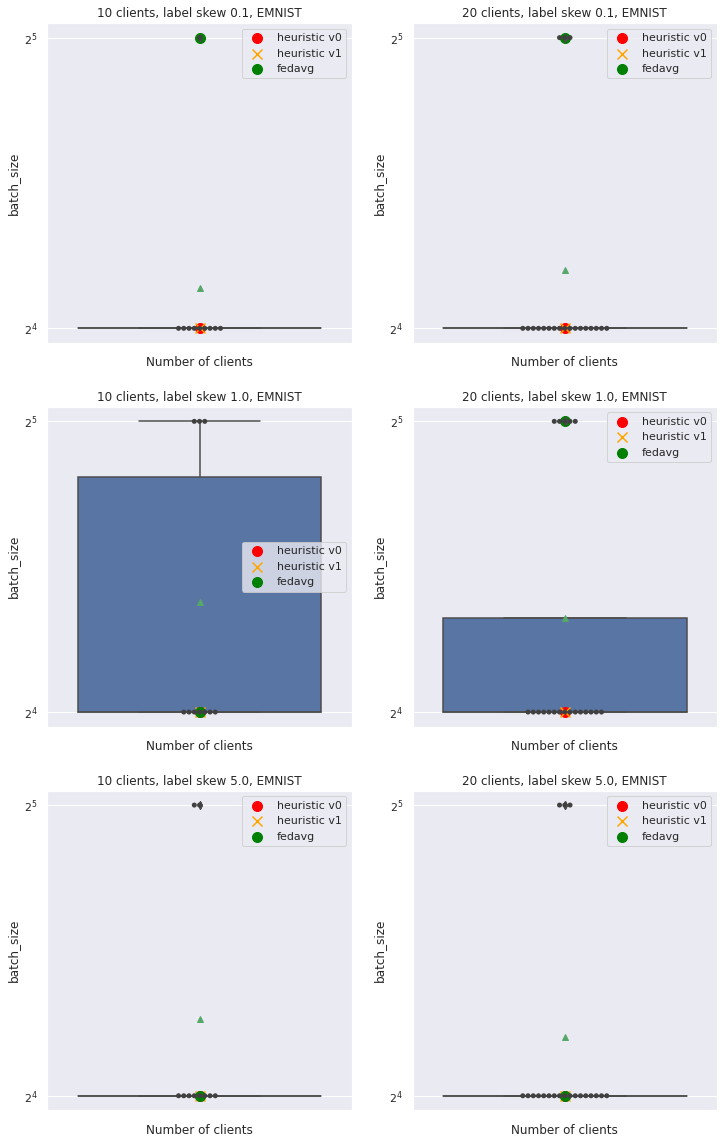

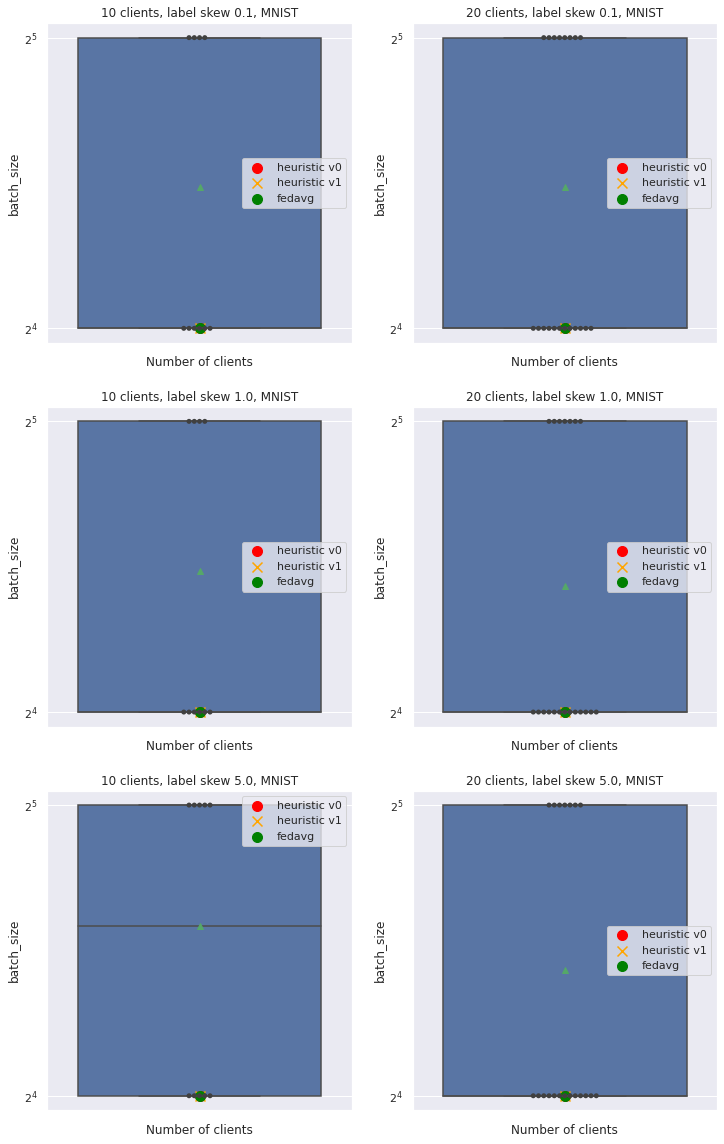

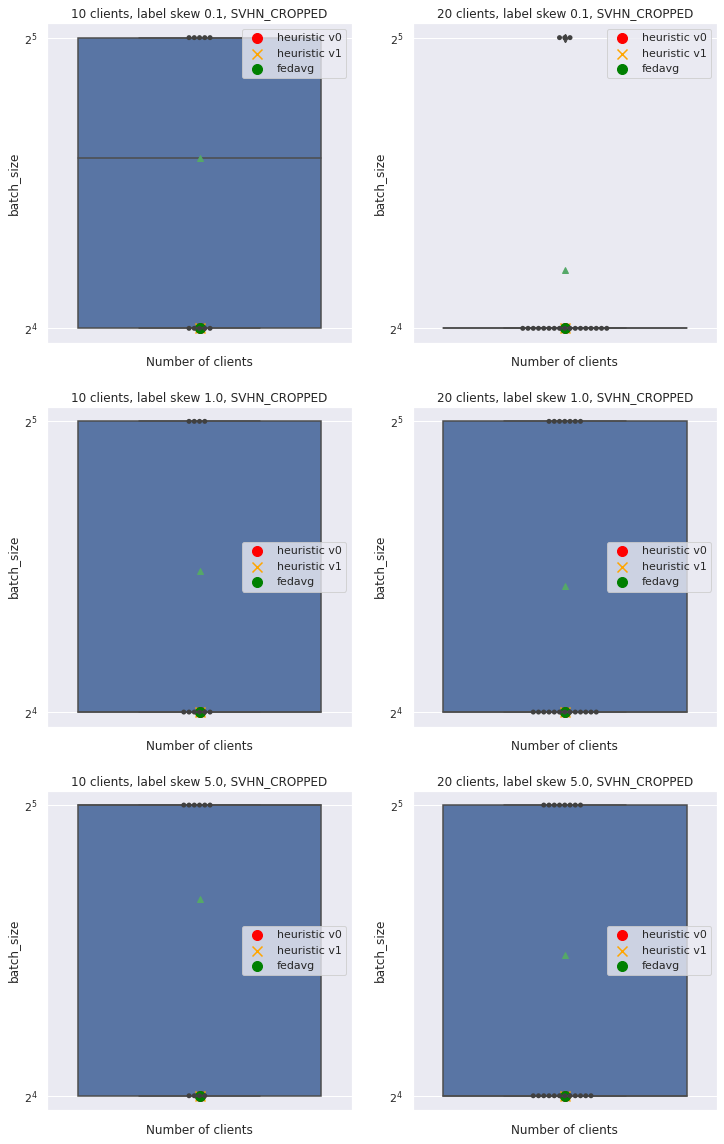

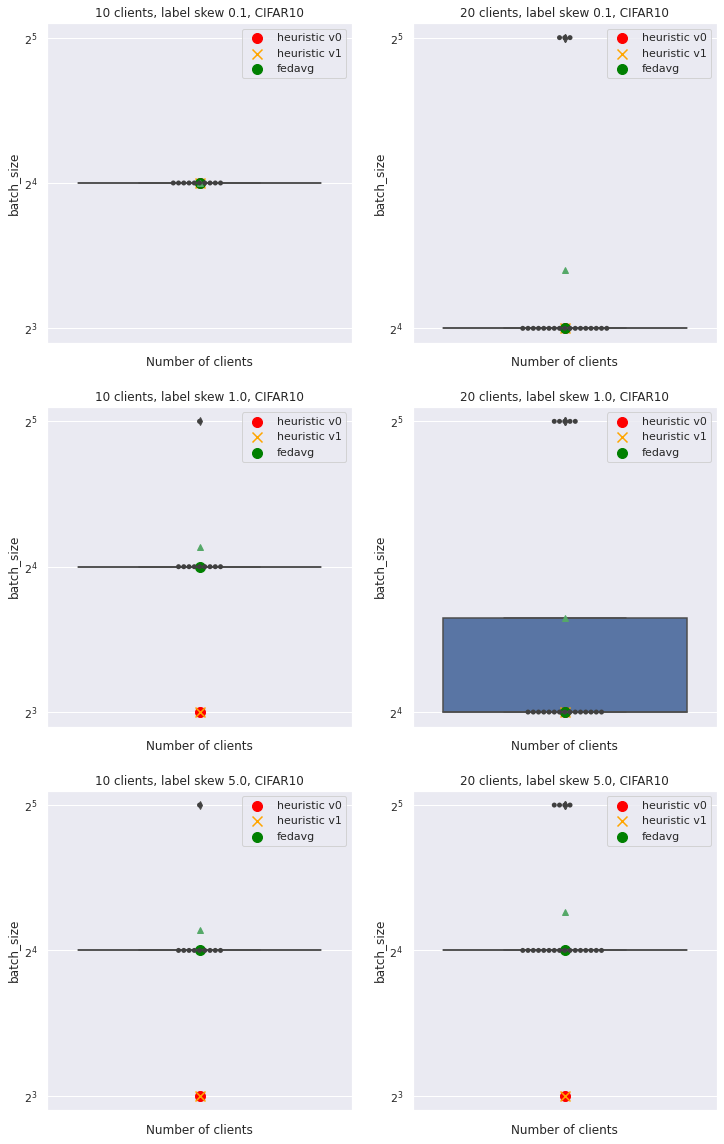

In [15]:
bs_label_heuristic_aes = {}
bs_label_baseline_aes = {}

for d in DATASETS:
    heuristic_aes, baseline_aes = plot_results(d, LABEL_SKEWS, NR_PARTIES, "batch_size", "label")
    bs_label_heuristic_aes = sum_dicts(bs_label_heuristic_aes, heuristic_aes)
    bs_label_baseline_aes = sum_dicts(bs_label_baseline_aes, baseline_aes)

In [16]:
for v in ['v0']:
    print(f"Heuristic {v} MAE: {np.mean(bs_label_heuristic_aes[v]):.3f} ± {np.std(bs_label_heuristic_aes[v]):.3f}")
print(f"Mean MAE: {np.mean(bs_label_baseline_aes['mean']):.3f} ± {np.std(bs_label_baseline_aes['mean']):.3f}")
print(f"Median MAE: {np.mean(bs_label_baseline_aes['median']):.3f} ± {np.std(bs_label_baseline_aes['median']):.3f}")
print(f"Mode MAE: {np.mean(bs_label_baseline_aes['mode']):.3f} ± {np.std(bs_label_baseline_aes['mode']):.3f}")

Heuristic v0 MAE: 3.000 ± 5.568
Mean MAE: 2.667 ± 5.963
Median MAE: 2.667 ± 5.963
Mode MAE: 3.333 ± 6.498


Comments:
- Mean between two batch sizes does not make sense, since the fedavg batch size is discrete
    - solution: project aggregation result to the closest power of two
- Batch size heuristic slightly worse performance than baseline.
- In general, heuristic tends to underestimate best batch size.
- Accuracy might be more suitable metric.

### Label skew - Momentum Results

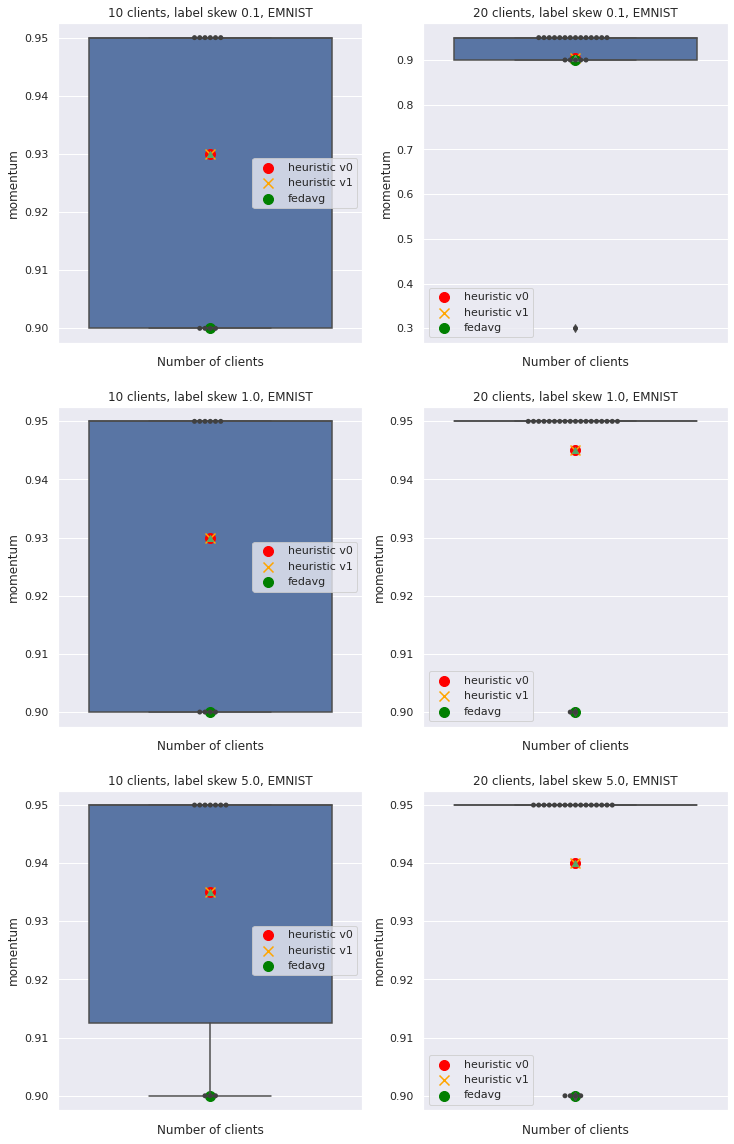

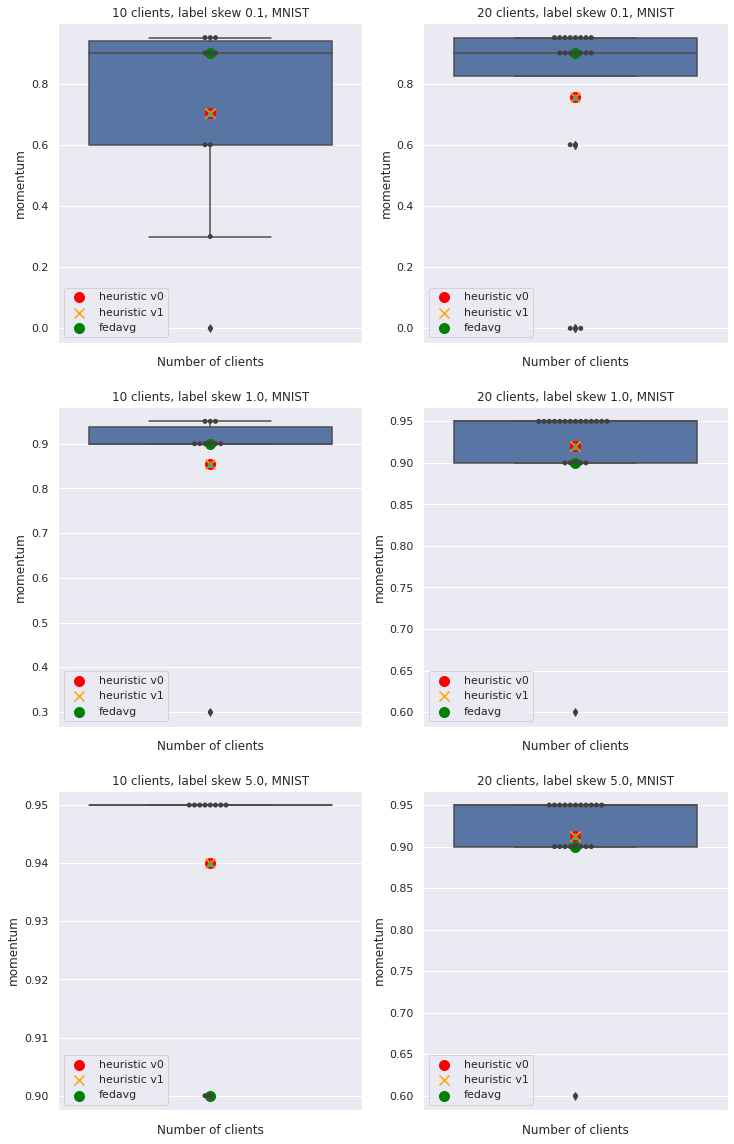

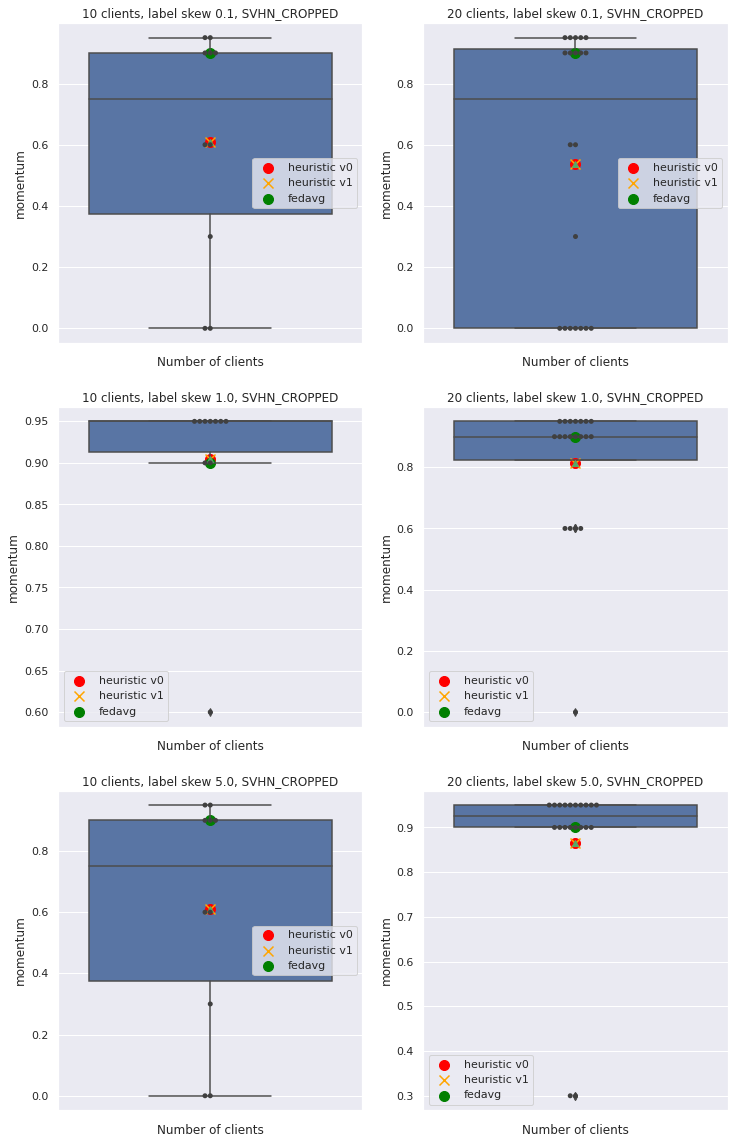

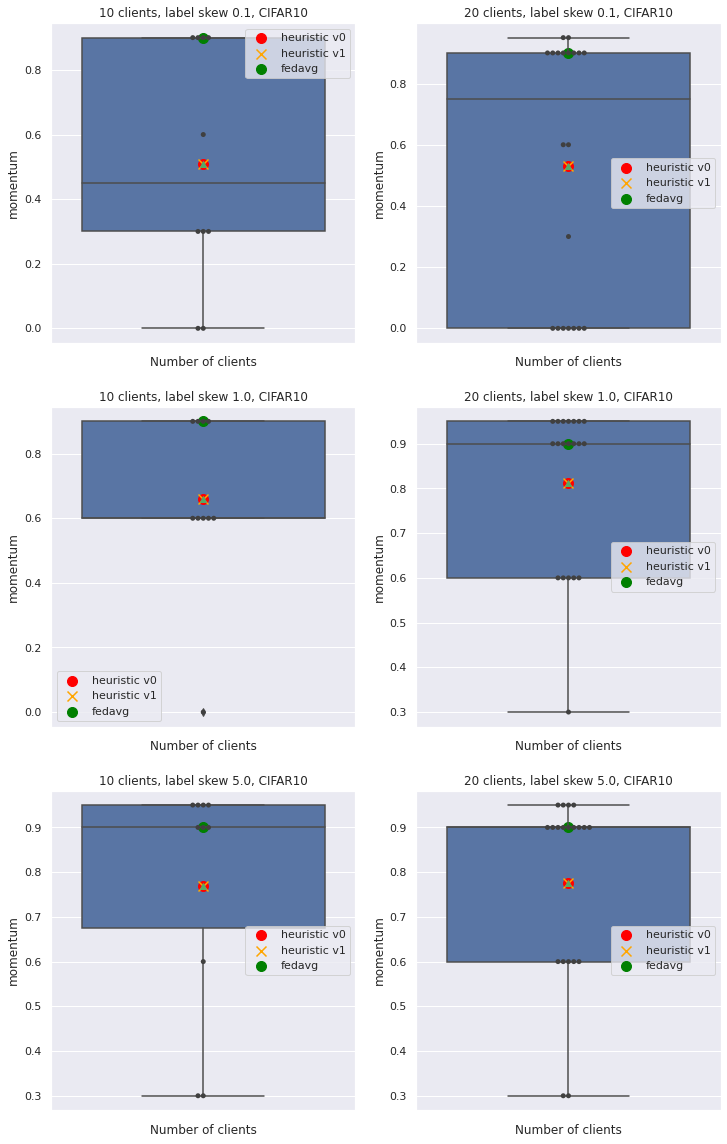

In [17]:
mom_label_heuristic_aes = {}
mom_label_baseline_aes = {}

for d in DATASETS:
    heuristic_aes, baseline_aes = plot_results(d, LABEL_SKEWS, NR_PARTIES, "momentum", "label")
    mom_label_heuristic_aes = sum_dicts(mom_label_heuristic_aes, heuristic_aes)
    mom_label_baseline_aes = sum_dicts(mom_label_baseline_aes, baseline_aes)

In [18]:
for v in ['v0']:
    print(f"Heuristic MAE: {np.mean(mom_label_heuristic_aes[v]):.3f} ± {np.std(mom_label_heuristic_aes[v]):.3f}")
print(f"Mean MAE: {np.mean(mom_label_baseline_aes['mean']):.3f} ± {np.std(mom_label_baseline_aes['mean']):.3f}")
print(f"Median MAE: {np.mean(mom_label_baseline_aes['median']):.3f} ± {np.std(mom_label_baseline_aes['median']):.3f}")

Heuristic MAE: 0.127 ± 0.125
Mean MAE: 0.127 ± 0.125
Median MAE: 0.078 ± 0.104


Comments:
- Heuristic is equal to mean baseline.
- Median performs slightly better than mean.

## Quantity skew

### Quantity skew - Learning Rate Results

File for client 16 in MNIST ('0.1', 20, 'qty') does not exist.
File for client 17 in MNIST ('0.1', 20, 'qty') does not exist.
File for client 18 in MNIST ('0.1', 20, 'qty') does not exist.
File for client 19 in MNIST ('0.1', 20, 'qty') does not exist.
File for client 8 in MNIST ('0.4', 10, 'qty') does not exist.
File for client 9 in MNIST ('0.4', 10, 'qty') does not exist.
File for client 18 in MNIST ('0.4', 20, 'qty') does not exist.
File for client 19 in MNIST ('0.4', 20, 'qty') does not exist.
File for client 9 in MNIST ('1.0', 10, 'qty') does not exist.
File for client 17 in MNIST ('1.0', 20, 'qty') does not exist.
File for client 18 in MNIST ('1.0', 20, 'qty') does not exist.
File for client 19 in MNIST ('1.0', 20, 'qty') does not exist.
File for client 9 in MNIST ('2.0', 10, 'qty') does not exist.
File for client 18 in MNIST ('2.0', 20, 'qty') does not exist.
File for client 19 in MNIST ('2.0', 20, 'qty') does not exist.


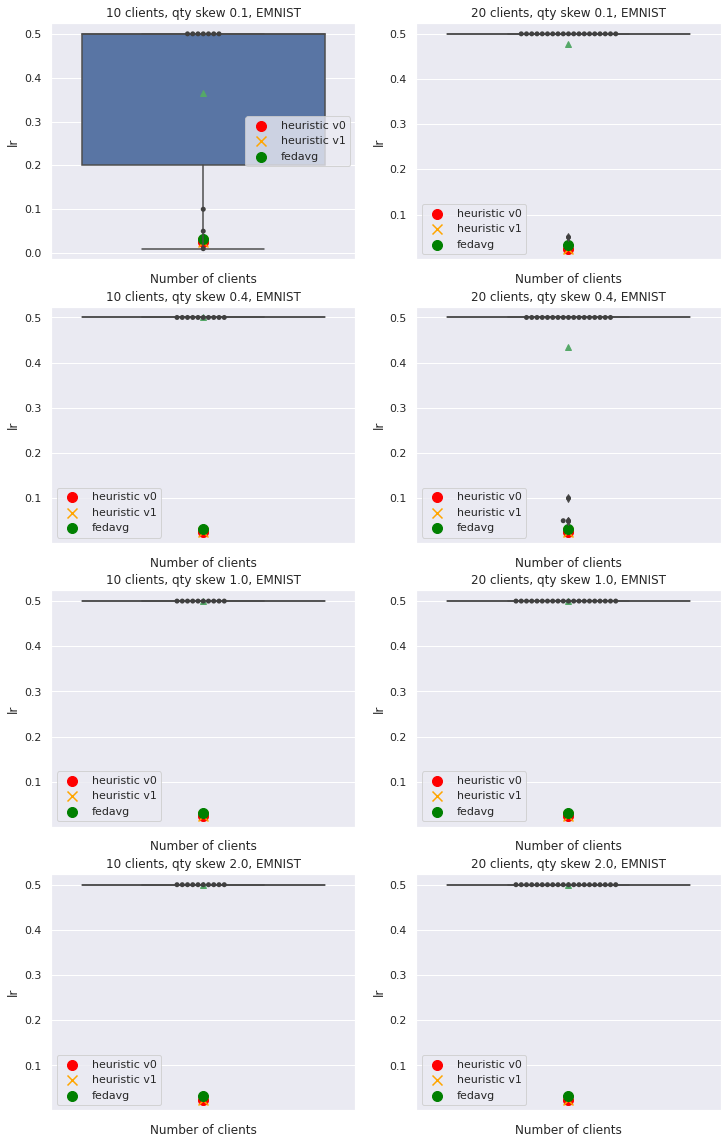

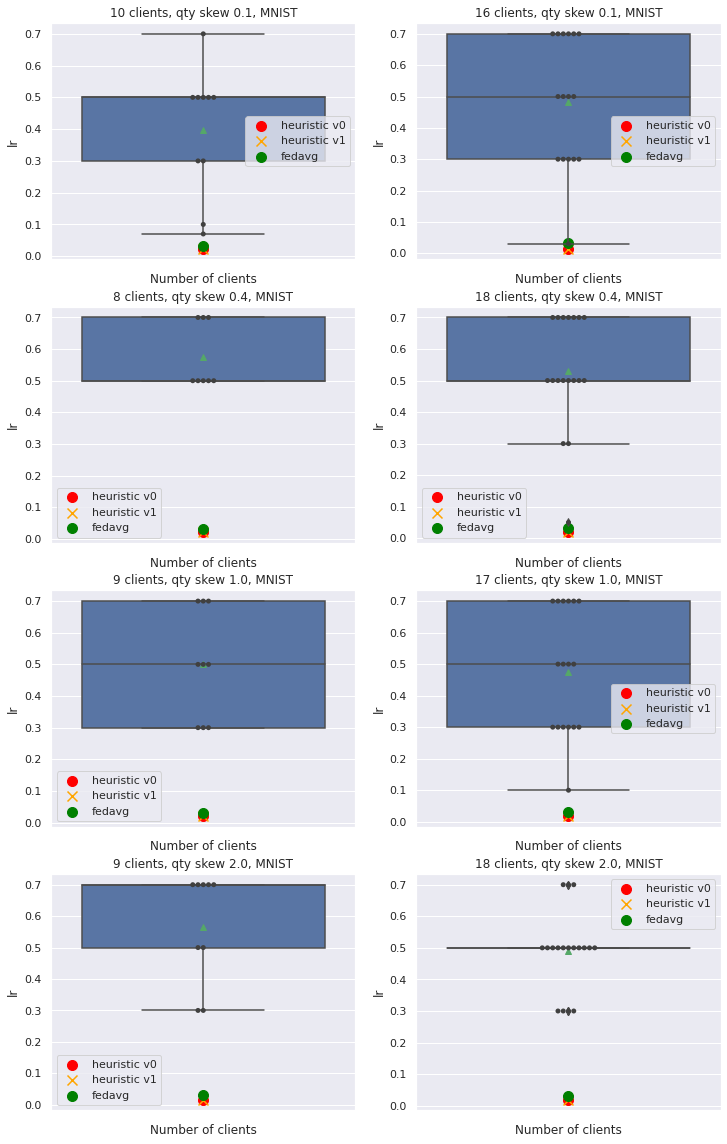

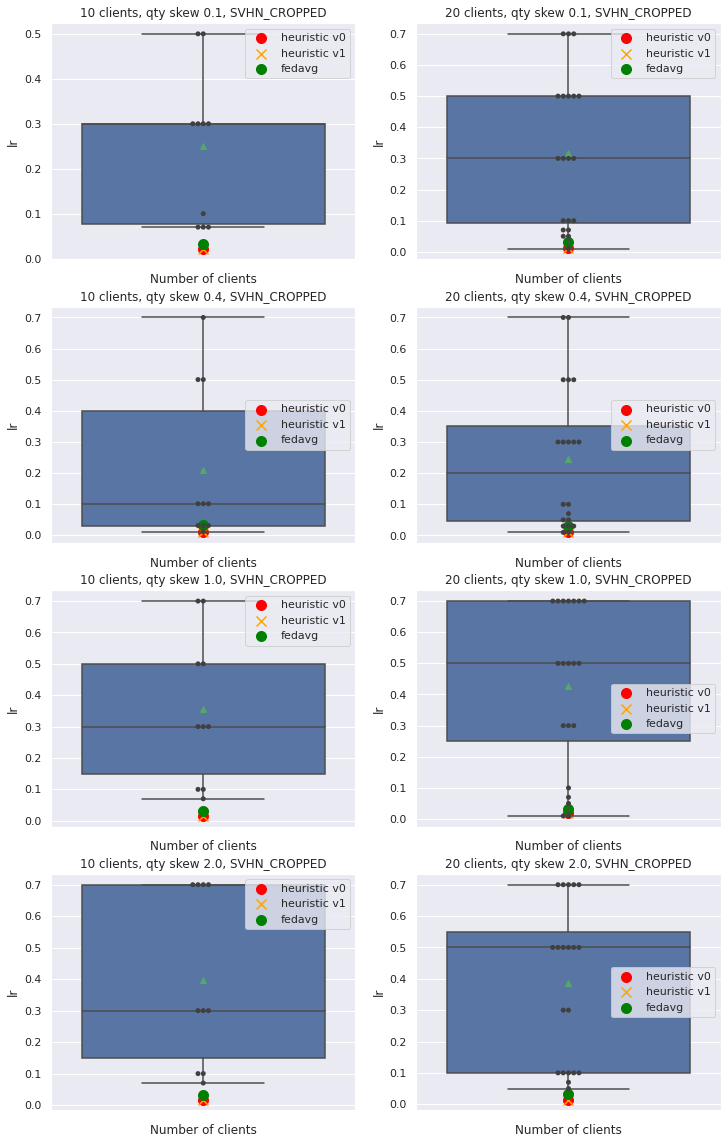

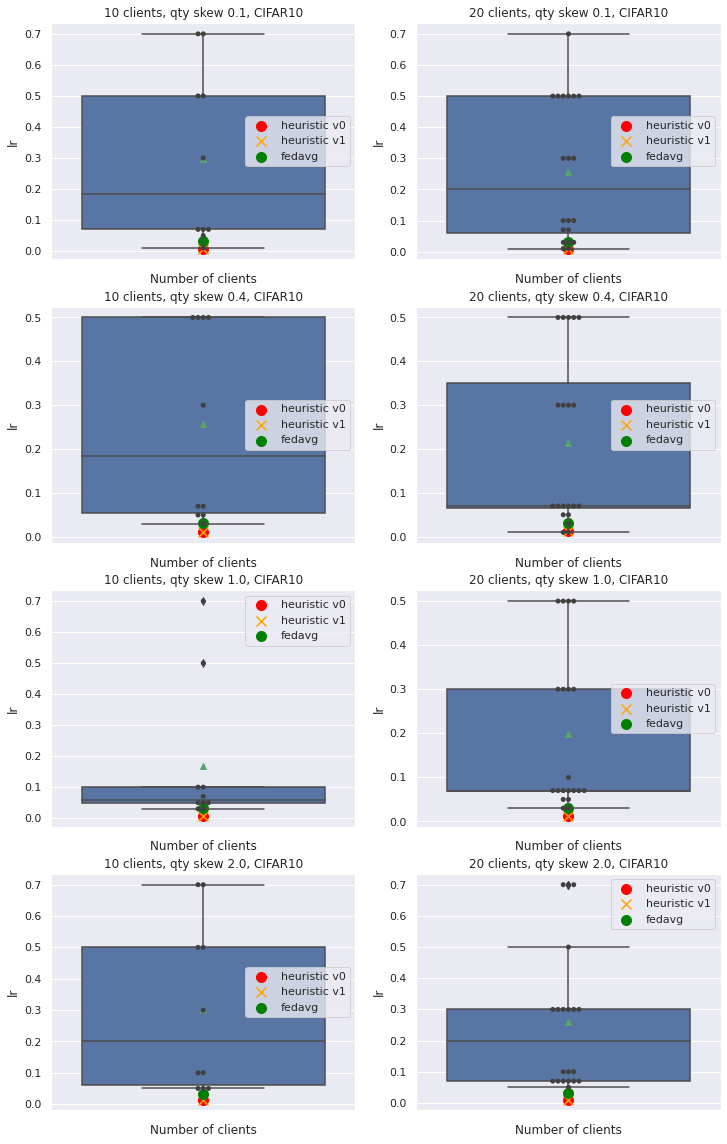

In [19]:
lr_qty_heuristic_aes = {}
lr_qty_baseline_aes = {}

for d in DATASETS:
    heuristic_aes, baseline_aes = plot_results(d, QTY_SKEWS, NR_PARTIES, "lr", "qty")
    lr_qty_heuristic_aes = sum_dicts(lr_qty_heuristic_aes, heuristic_aes)
    lr_qty_baseline_aes = sum_dicts(lr_qty_baseline_aes, baseline_aes)

In [20]:
for v in ['v0']:
    print(f"Heuristic {v} MAE: {np.mean(lr_qty_heuristic_aes[v]):.3f} ± {np.std(lr_qty_heuristic_aes[v]):.3f}")
print(f"Mean MAE: {np.mean(lr_qty_baseline_aes['mean']):.3f} ± {np.std(lr_qty_baseline_aes['mean']):.3f}")
print(f"Median MAE: {np.mean(lr_qty_baseline_aes['median']):.3f} ± {np.std(lr_qty_baseline_aes['median']):.3f}")

Heuristic v0 MAE: 0.014 ± 0.006
Mean MAE: 0.354 ± 0.120
Median MAE: 0.339 ± 0.172


Comments:
- Heuristic performs well, considerably better than baselines.
- Global learning rate consistently smaller than local learning rates found by clients.

### Quantity skew - Batch Size Results

File for client 16 in MNIST ('0.1', 20, 'qty') does not exist.
File for client 17 in MNIST ('0.1', 20, 'qty') does not exist.
File for client 18 in MNIST ('0.1', 20, 'qty') does not exist.
File for client 19 in MNIST ('0.1', 20, 'qty') does not exist.
File for client 8 in MNIST ('0.4', 10, 'qty') does not exist.
File for client 9 in MNIST ('0.4', 10, 'qty') does not exist.
File for client 18 in MNIST ('0.4', 20, 'qty') does not exist.
File for client 19 in MNIST ('0.4', 20, 'qty') does not exist.
File for client 9 in MNIST ('1.0', 10, 'qty') does not exist.
File for client 17 in MNIST ('1.0', 20, 'qty') does not exist.
File for client 18 in MNIST ('1.0', 20, 'qty') does not exist.
File for client 19 in MNIST ('1.0', 20, 'qty') does not exist.
File for client 9 in MNIST ('2.0', 10, 'qty') does not exist.
File for client 18 in MNIST ('2.0', 20, 'qty') does not exist.
File for client 19 in MNIST ('2.0', 20, 'qty') does not exist.


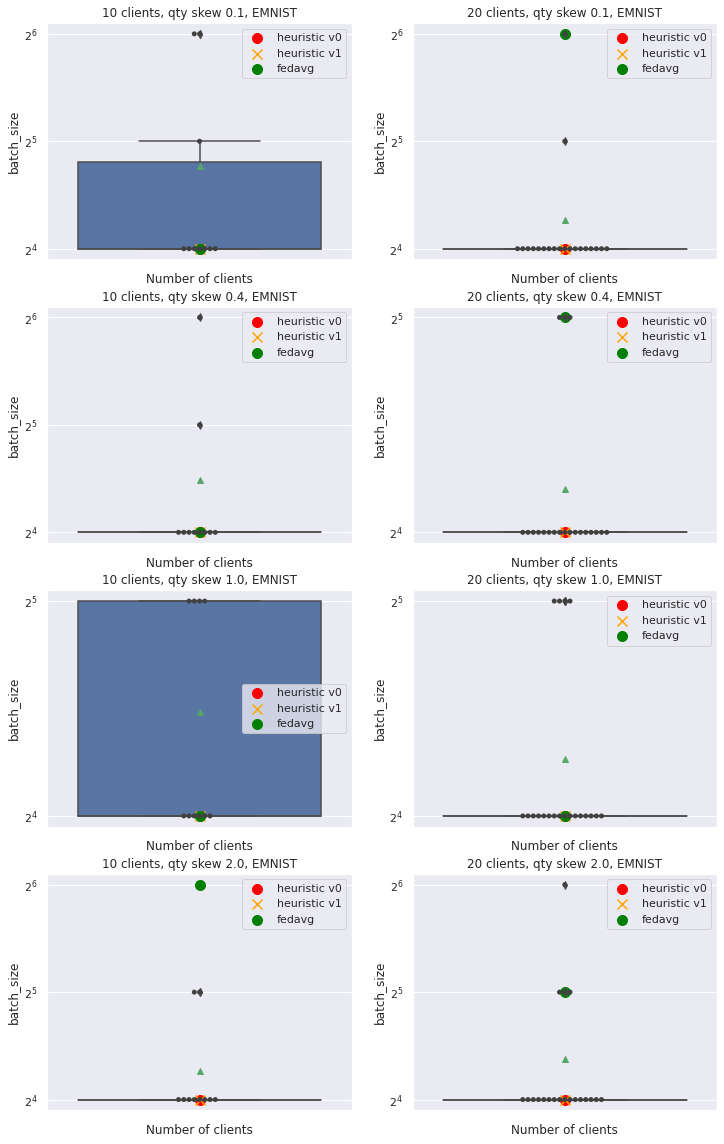

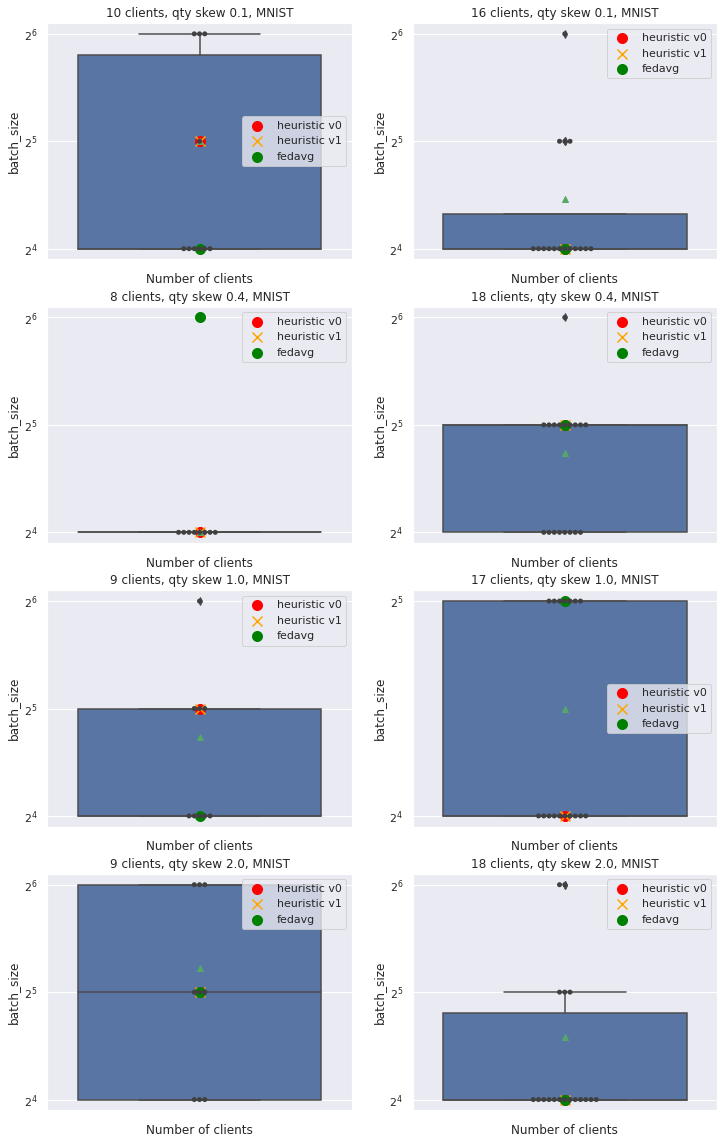

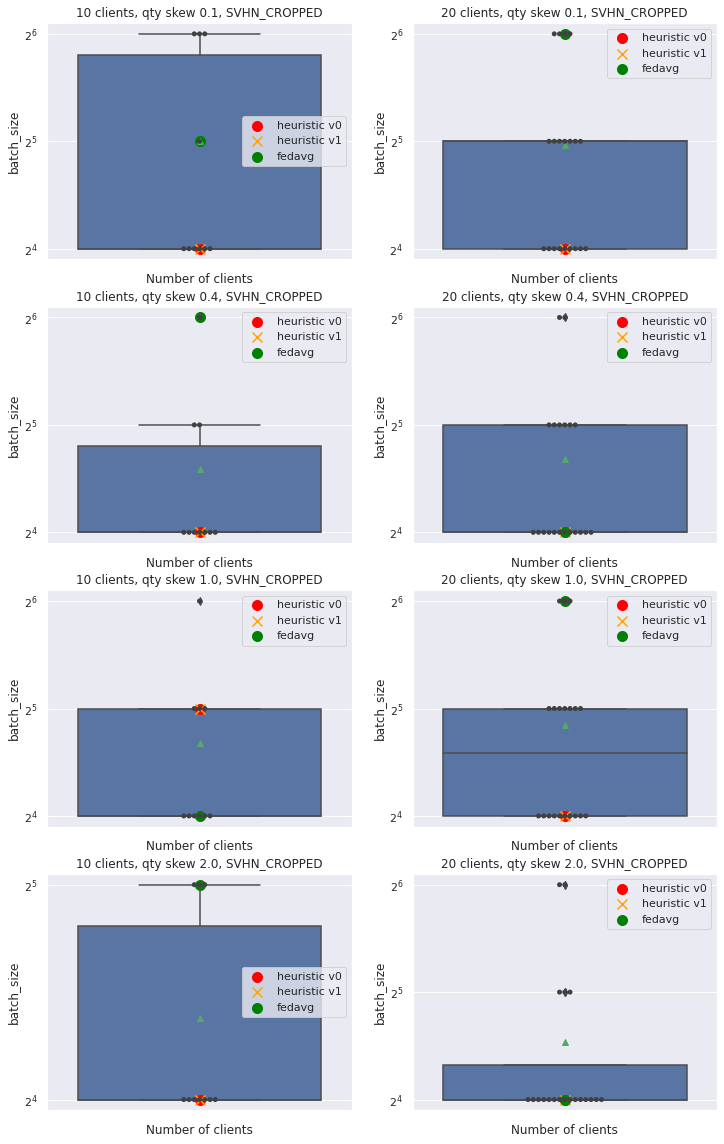

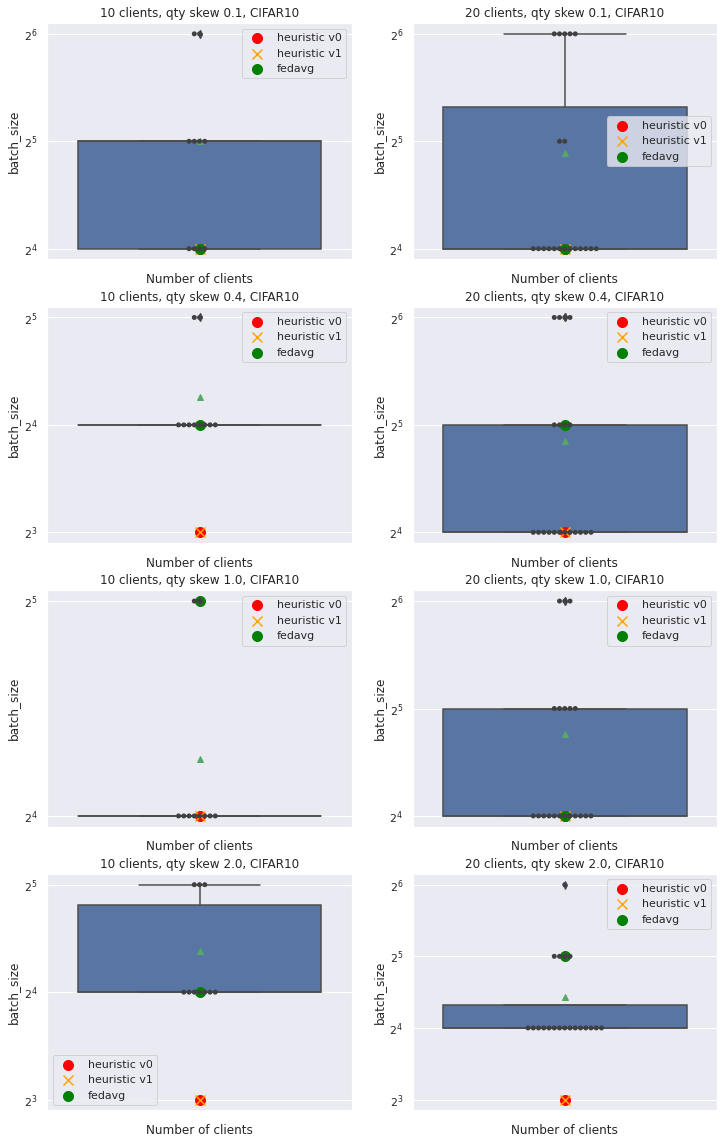

In [21]:
bs_qty_heuristic_aes = {}
bs_qty_baseline_aes = {}

for d in DATASETS:
    heuristic_aes, baseline_aes = plot_results(d, QTY_SKEWS, NR_PARTIES, "batch_size", "qty")
    bs_qty_heuristic_aes = sum_dicts(bs_qty_heuristic_aes, heuristic_aes)
    bs_qty_baseline_aes = sum_dicts(bs_qty_baseline_aes, baseline_aes)

In [22]:
for v in ['v0']:
    print(f"Heuristic MAE: {np.mean(bs_qty_heuristic_aes[v]):.3f} ± {np.std(bs_qty_heuristic_aes[v]):.3f}")
print(f"Mean MAE: {np.mean(bs_qty_baseline_aes['mean']):.3f} ± {np.std(bs_qty_baseline_aes['mean']):.3f}")
print(f"Median MAE: {np.mean(bs_qty_baseline_aes['median']):.3f} ± {np.std(bs_qty_baseline_aes['median']):.3f}")
print(f"Mode MAE: {np.mean(bs_qty_baseline_aes['mode']):.3f} ± {np.std(bs_qty_baseline_aes['mode']):.3f}")

Heuristic MAE: 15.250 ± 17.362
Mean MAE: 15.000 ± 15.460
Median MAE: 13.000 ± 17.176
Mode MAE: 13.500 ± 17.937


Comments:
- Batch size heuristic very bad, tends to underestimate.

### Quantity skew - Momentum Results

File for client 16 in MNIST ('0.1', 20, 'qty') does not exist.
File for client 17 in MNIST ('0.1', 20, 'qty') does not exist.
File for client 18 in MNIST ('0.1', 20, 'qty') does not exist.
File for client 19 in MNIST ('0.1', 20, 'qty') does not exist.
File for client 8 in MNIST ('0.4', 10, 'qty') does not exist.
File for client 9 in MNIST ('0.4', 10, 'qty') does not exist.
File for client 18 in MNIST ('0.4', 20, 'qty') does not exist.
File for client 19 in MNIST ('0.4', 20, 'qty') does not exist.
File for client 9 in MNIST ('1.0', 10, 'qty') does not exist.
File for client 17 in MNIST ('1.0', 20, 'qty') does not exist.
File for client 18 in MNIST ('1.0', 20, 'qty') does not exist.
File for client 19 in MNIST ('1.0', 20, 'qty') does not exist.
File for client 9 in MNIST ('2.0', 10, 'qty') does not exist.
File for client 18 in MNIST ('2.0', 20, 'qty') does not exist.
File for client 19 in MNIST ('2.0', 20, 'qty') does not exist.


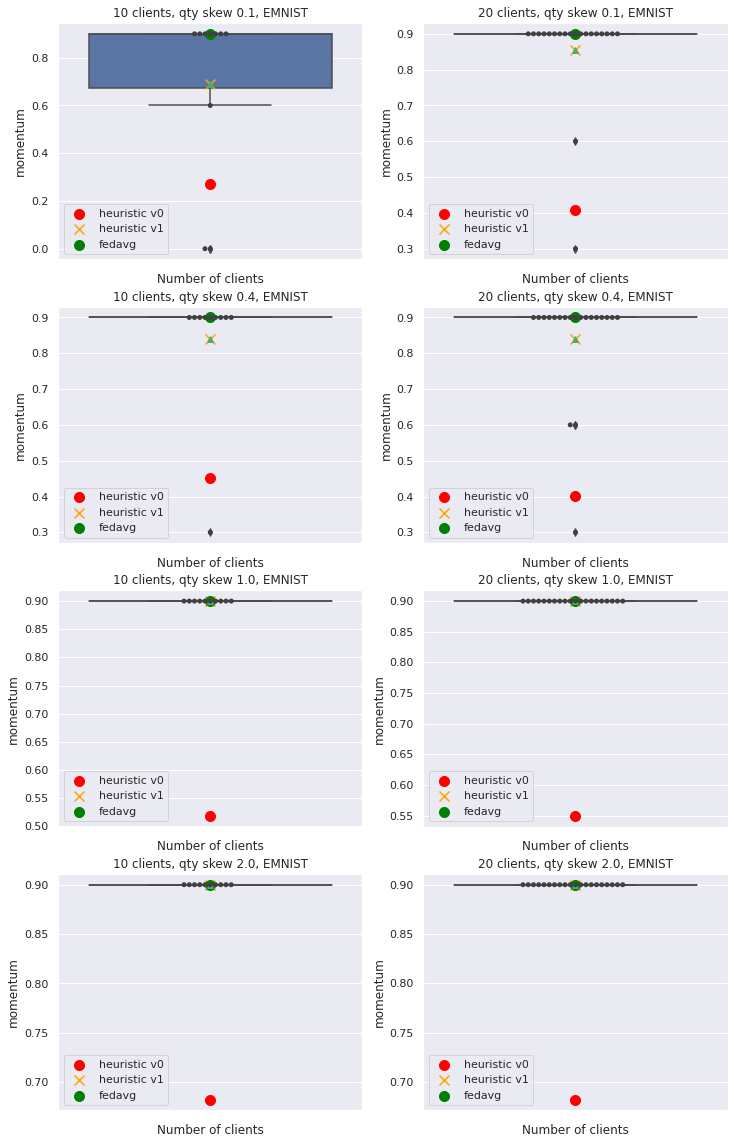

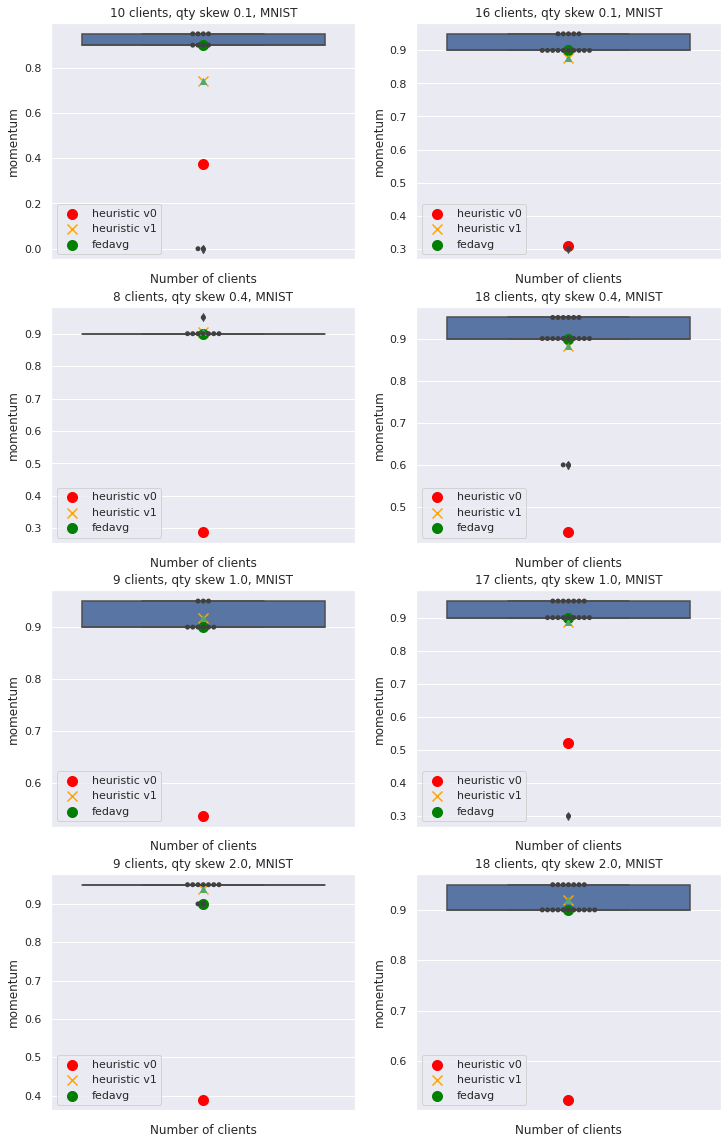

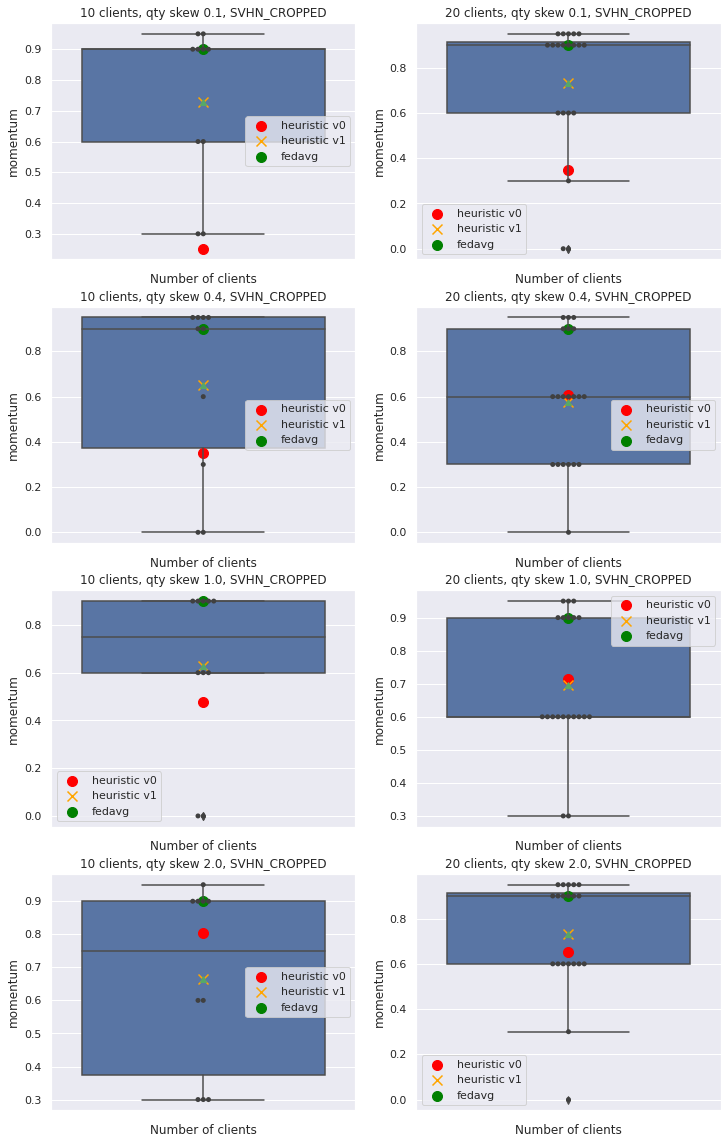

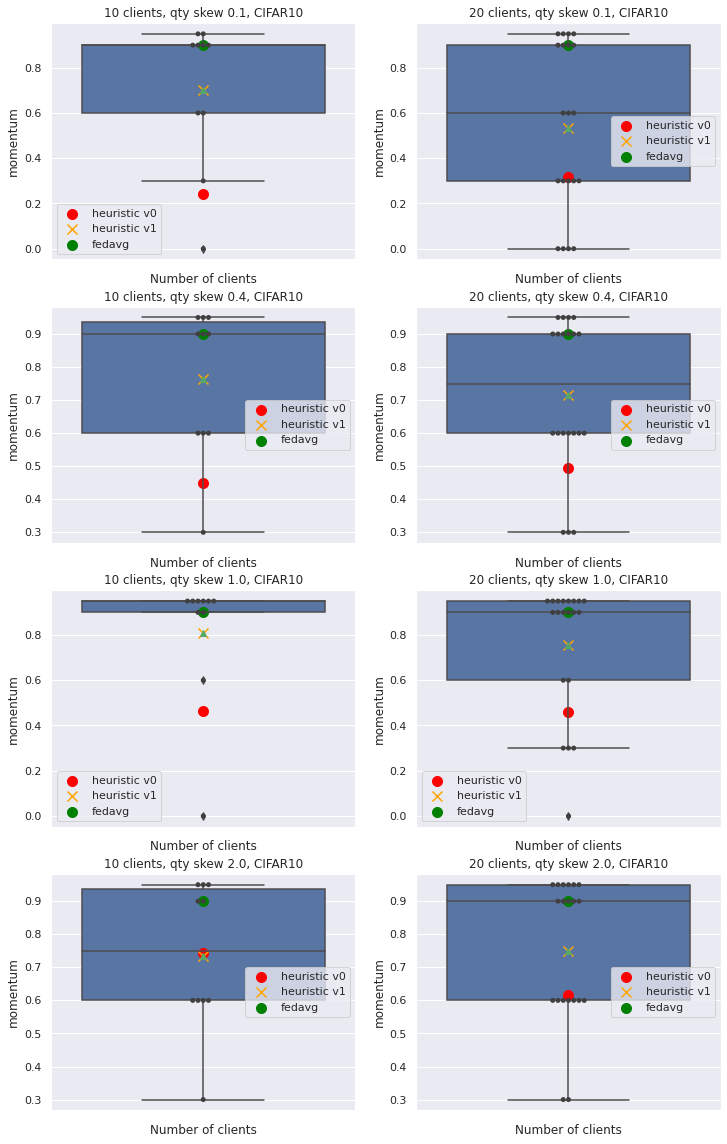

In [23]:
mom_qty_heuristic_aes = {}
mom_qty_baseline_aes = {}

for d in DATASETS:
    heuristic_aes, baseline_aes = plot_results(d, QTY_SKEWS, NR_PARTIES, "momentum", "qty")
    mom_qty_heuristic_aes = sum_dicts(mom_qty_heuristic_aes, heuristic_aes)
    mom_qty_baseline_aes = sum_dicts(mom_qty_baseline_aes, baseline_aes)

In [24]:
for v in ['v0', 'v1']:
    print(f"Heuristic {v} MAE: {np.mean(mom_qty_heuristic_aes[v]):.3f} ± {np.std(mom_qty_heuristic_aes[v]):.3f}")
print(f"Mean MAE: {np.mean(mom_qty_baseline_aes['mean']):.3f} ± {np.std(mom_qty_baseline_aes['mean']):.3f}")
print(f"Median MAE: {np.mean(mom_qty_baseline_aes['median']):.3f} ± {np.std(mom_qty_baseline_aes['median']):.3f}")

Heuristic v0 MAE: 0.421 ± 0.148
Heuristic v1 MAE: 0.122 ± 0.102
Mean MAE: 0.122 ± 0.102
Median MAE: 0.050 ± 0.094


Comments:
- Momentum heuristic tends to underestimate.
- Median baseline performs best, considerably better than heuristic.